In [9]:
# Cell 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Cell 2: Load dataset
df = pd.read_csv(r"D:\Codes\pred_maintain\data\data.csv")
print("Shape:", df.shape)
df.head()


Shape: (11934, 19)


index  Lever position   Ship speed (v)   \
0      0            1.138                3   
1      1            2.088                6   
2      2            3.144                9   
3      3            4.161               12   
4      4            5.140               15   

   Gas Turbine (GT) shaft torque (GTT) [kN m]    \
0                                       289.964   
1                                      6960.180   
2                                      8379.229   
3                                     14724.395   
4                                     21636.432   

   GT rate of revolutions (GTn) [rpm]    \
0                              1349.489   
1                              1376.166   
2                              1386.757   
3                              1547.465   
4                              1924.313   

   Gas Generator rate of revolutions (GGn) [rpm]    \
0                                         6677.380   
1                                         6828.469   
2                                         7111.811   
3                                         7792.630   
4                                         8494.777   

   Starboard Propeller Torque (Ts) [kN]    Port Propeller Torque (Tp) [kN]    \
0                                   7.584                              7.584   
1                                  28.204                             28.204   
2                                  60.358                             60.358   
3                                 113.774                            113.774   
4                                 175.306                            175.306   

   Hight Pressure (HP) Turbine exit temperature (T48) [C]    \
0                                            464.006          
1                                            635.401          
2                                            606.002          
3                                            661.471          
4                                            731.494          

   GT Compressor inlet air temperature (T1) [C]    \
0                                             288   
1                                             288   
2                                             288   
3                                             288   
4                                             288   

   GT Compressor outlet air temperature (T2) [C]    \
0                                          550.563   
1                                          581.658   
2                                          587.587   
3                                          613.851   
4                                          645.642   

   HP Turbine exit pressure (P48) [bar]    \
0                                   1.096   
1                                   1.331   
2                                   1.389   
3                                   1.658   
4                                   2.078   

   GT Compressor inlet air pressure (P1) [bar]    \
0                                          0.998   
1                                          0.998   
2                                          0.998   
3                                          0.998   
4                                          0.998   

   GT Compressor outlet air pressure (P2) [bar]    \
0                                           5.947   
1                                           7.282   
2                                           7.574   
3                                           9.007   
4                                          11.197   

   GT exhaust gas pressure (Pexh) [bar]    \
0                                   1.019   
1                                   1.019   
2                                   1.020   
3                                   1.022   
4                                   1.026   

   Turbine Injecton Control (TIC) [%]    Fuel flow (mf) [kg/s]    \
0                                 7.137                    0.082   
1                    

In [11]:
# Clean up column names (remove spaces, hidden characters)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\xa0', '', regex=True)  # remove non-breaking spaces
print(df.columns.tolist())


['index', 'Lever position', 'Ship speed (v)', 'Gas Turbine (GT) shaft torque (GTT) [kN m]', 'GT rate of revolutions (GTn) [rpm]', 'Gas Generator rate of revolutions (GGn) [rpm]', 'Starboard Propeller Torque (Ts) [kN]', 'Port Propeller Torque (Tp) [kN]', 'Hight Pressure (HP) Turbine exit temperature (T48) [C]', 'GT Compressor inlet air temperature (T1) [C]', 'GT Compressor outlet air temperature (T2) [C]', 'HP Turbine exit pressure (P48) [bar]', 'GT Compressor inlet air pressure (P1) [bar]', 'GT Compressor outlet air pressure (P2) [bar]', 'GT exhaust gas pressure (Pexh) [bar]', 'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]', 'GT Compressor decay state coefficient', 'GT Turbine decay state coefficient']


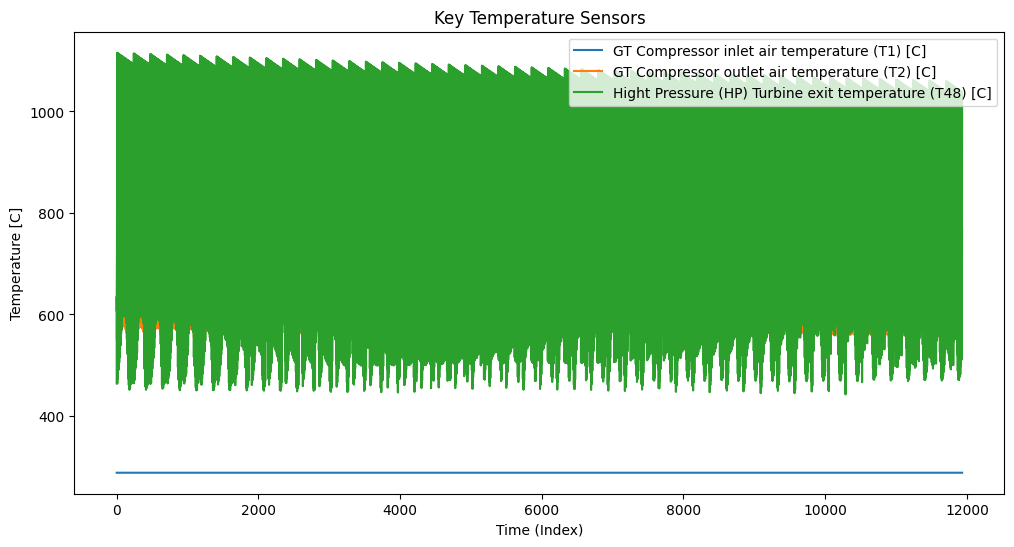

In [14]:
# Now use cleaned names
sensor_cols = [
    "GT Compressor inlet air temperature (T1) [C]",
    "GT Compressor outlet air temperature (T2) [C]",
    "Hight Pressure (HP) Turbine exit temperature (T48) [C]"
]

df[sensor_cols].plot(figsize=(12,6))
plt.title("Key Temperature Sensors")
plt.xlabel("Time (Index)")
plt.ylabel("Temperature [C]")
plt.legend()
plt.show()


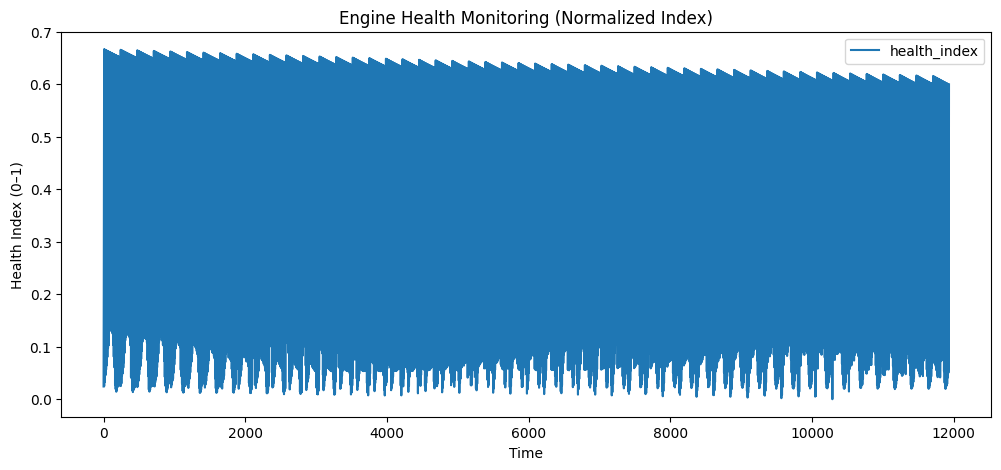

In [15]:
# Cell 4: Normalize sensor values for monitoring
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[sensor_cols]), columns=sensor_cols)

# Create a simple health index (average of scaled sensors)
df_scaled["health_index"] = df_scaled.mean(axis=1)

df_scaled[["health_index"]].plot(figsize=(12,5))
plt.title("Engine Health Monitoring (Normalized Index)")
plt.xlabel("Time")
plt.ylabel("Health Index (0–1)")
plt.show()


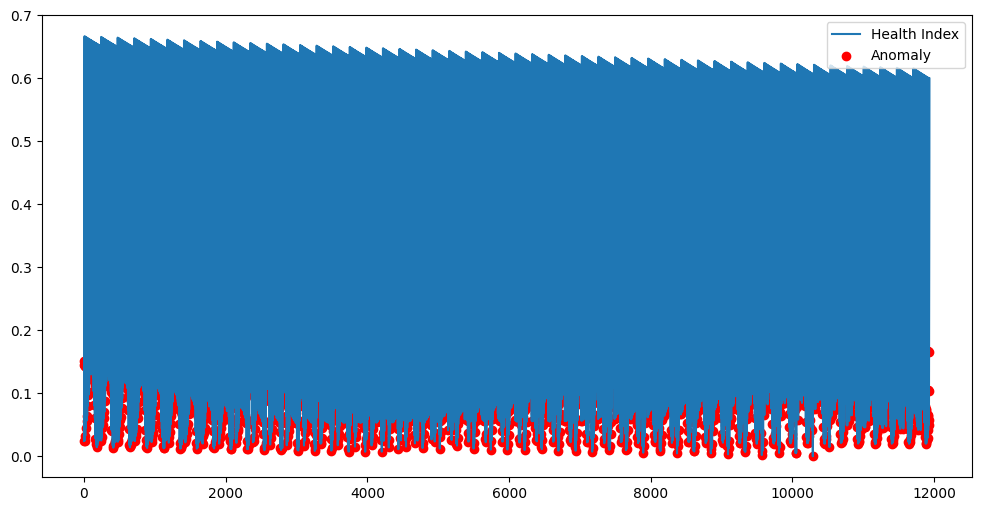

In [16]:
# Cell 5: Detect anomalies using simple thresholds
threshold = 0.2  # below 20% of normalized health
df_scaled["anomaly"] = df_scaled["health_index"] < threshold

plt.figure(figsize=(12,6))
plt.plot(df_scaled["health_index"], label="Health Index")
plt.scatter(df_scaled.index[df_scaled["anomaly"]], 
            df_scaled["health_index"][df_scaled["anomaly"]],
            color="red", label="Anomaly")
plt.legend()
plt.show()


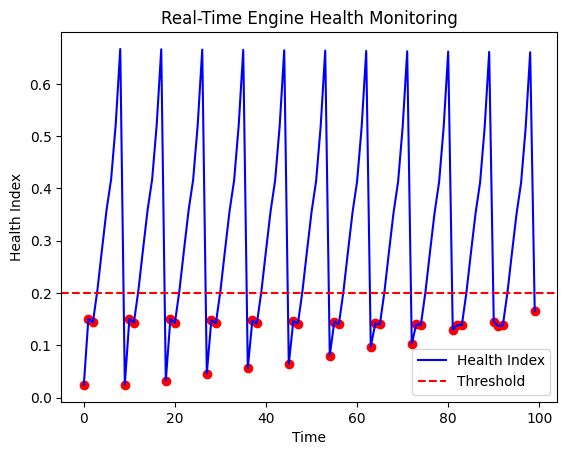

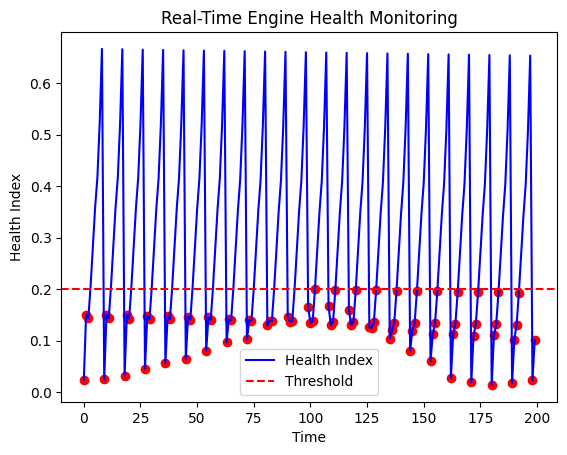

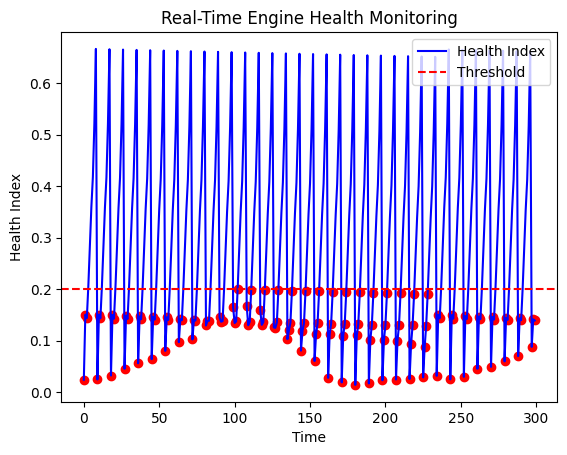

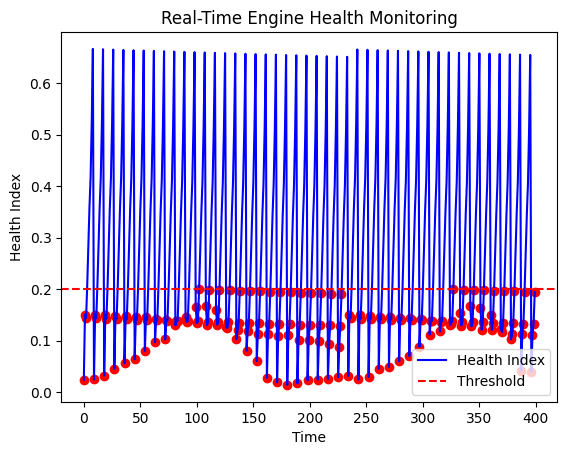

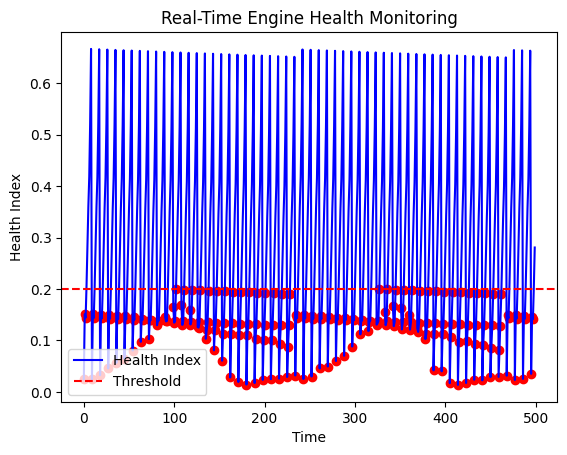

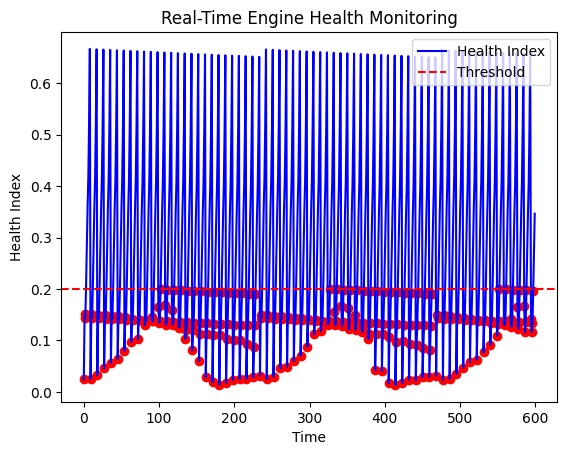

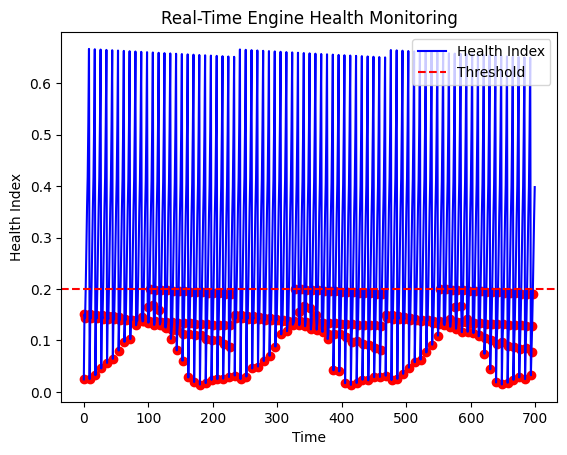

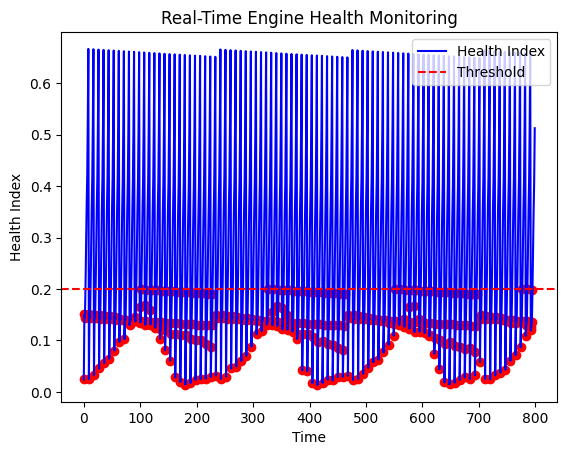

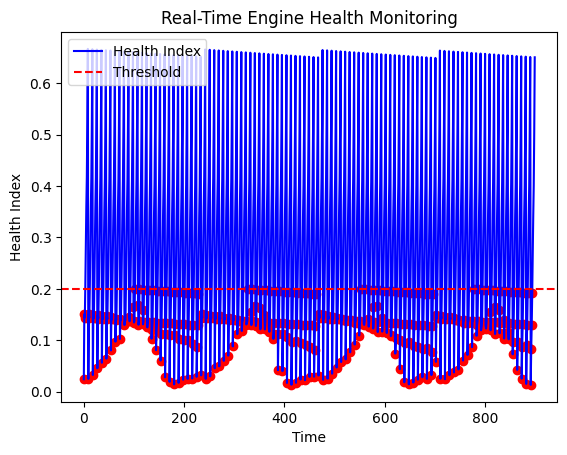

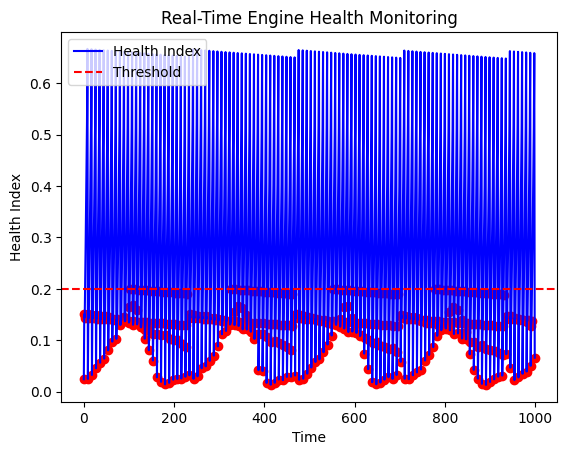

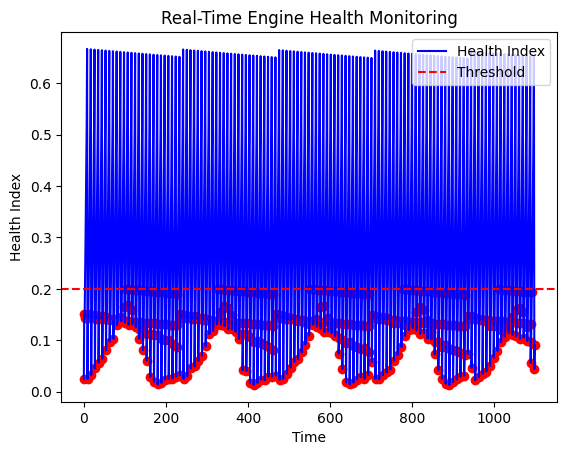

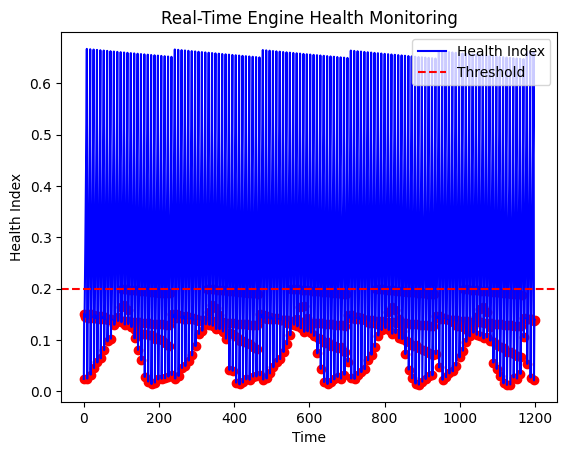

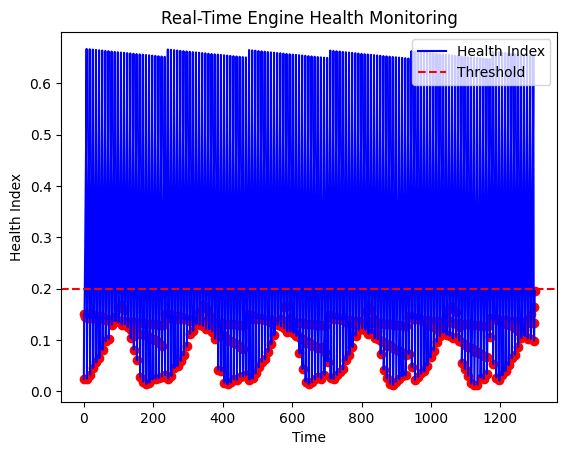

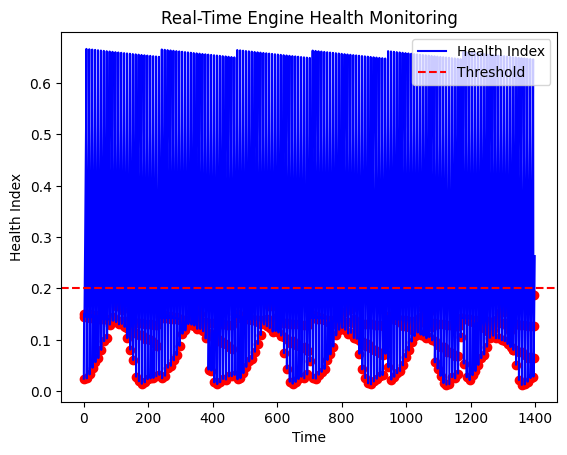

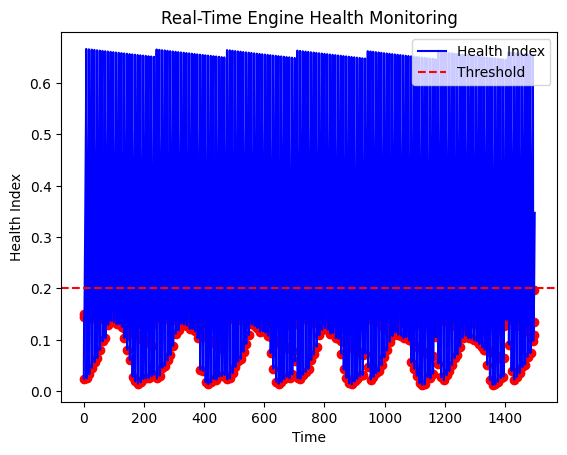

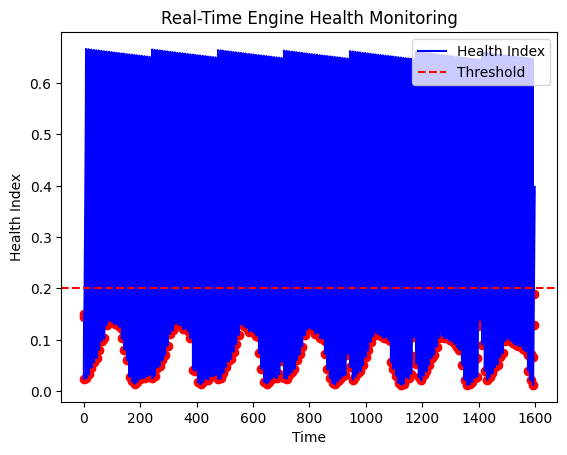

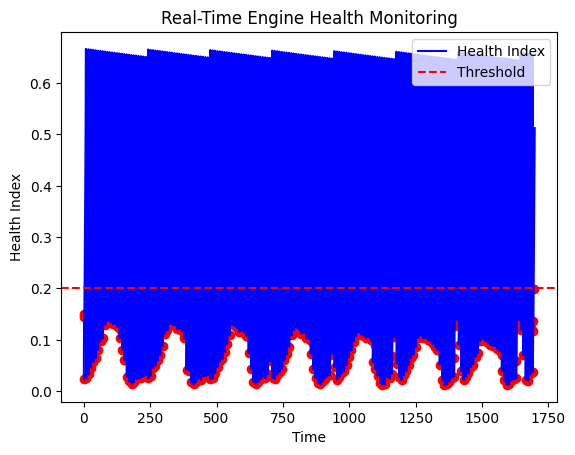

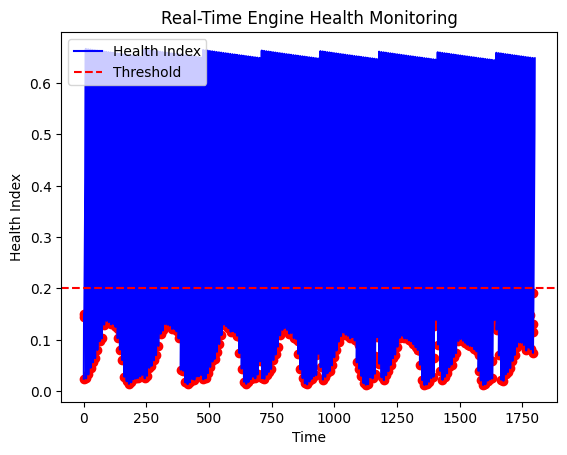

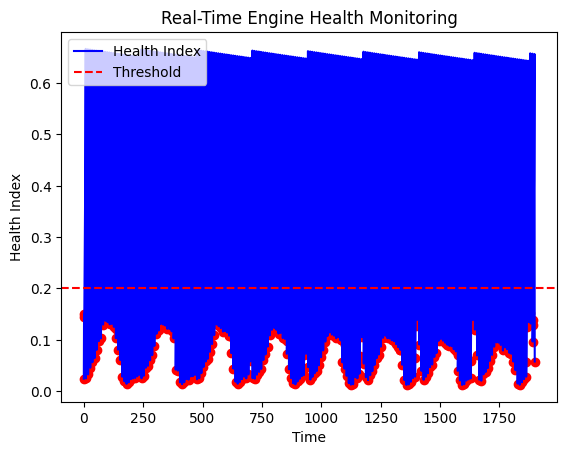

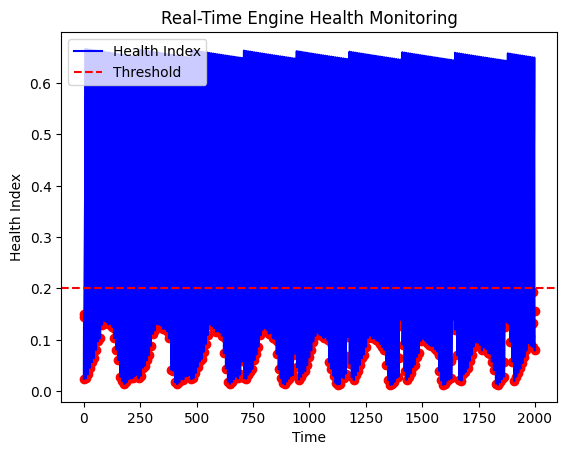

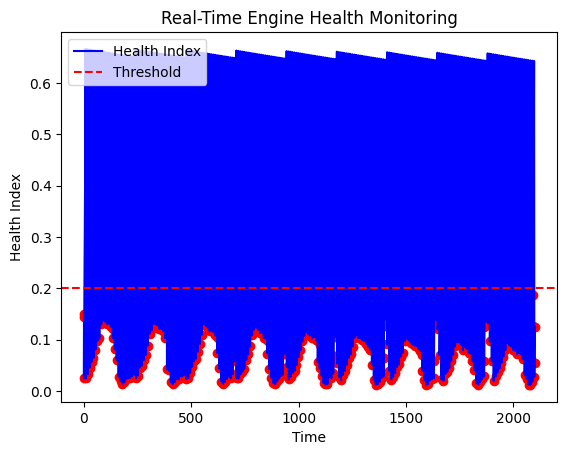

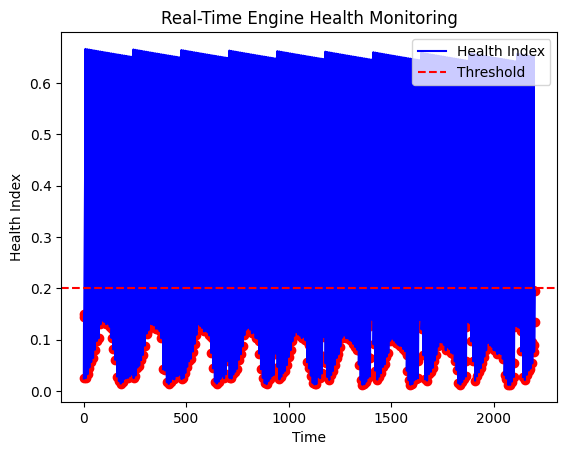

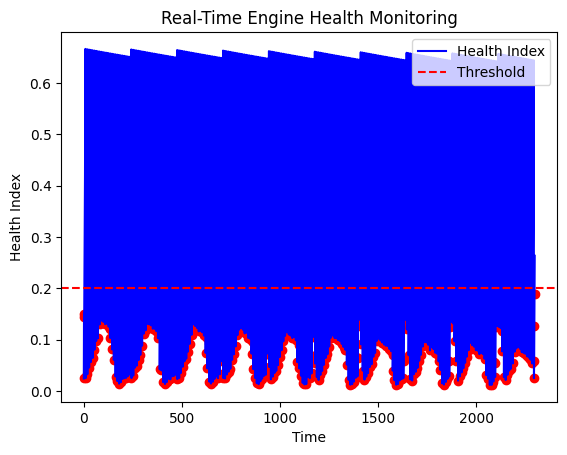

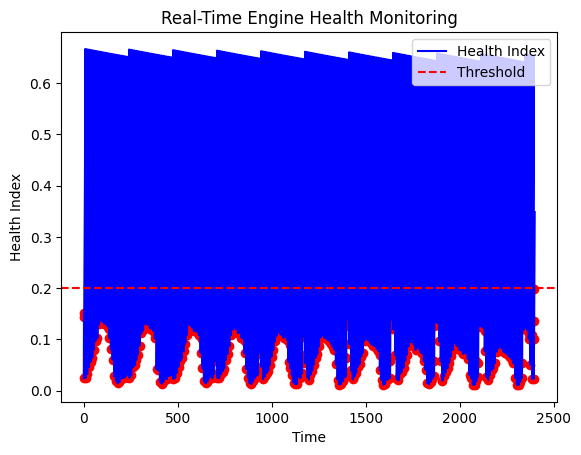

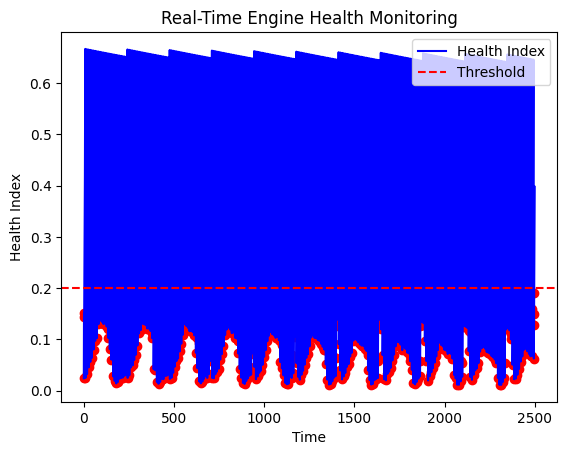

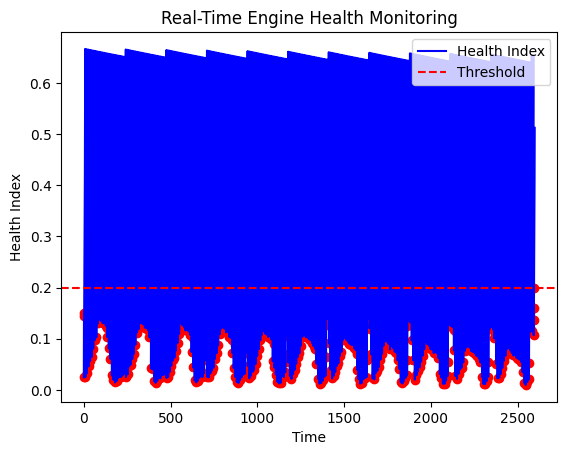

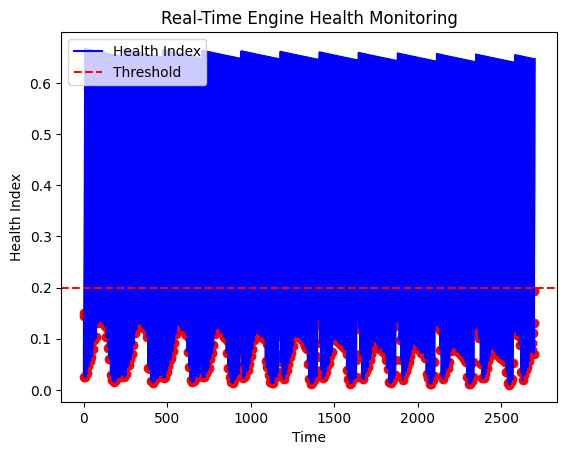

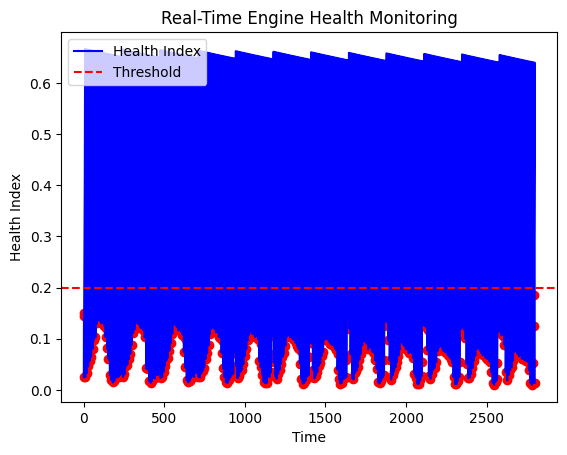

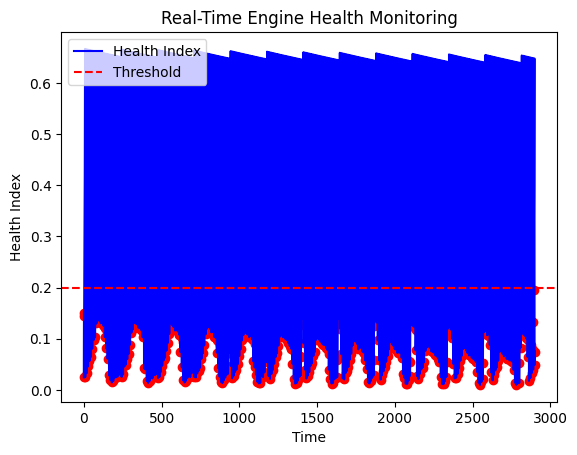

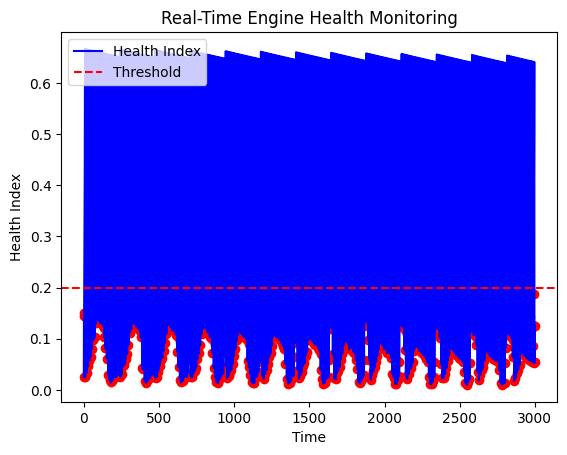

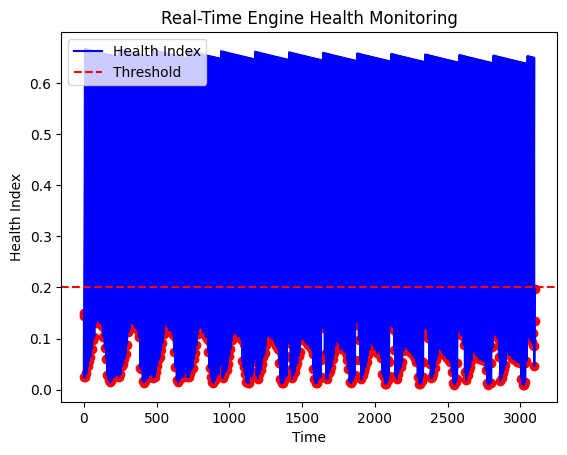

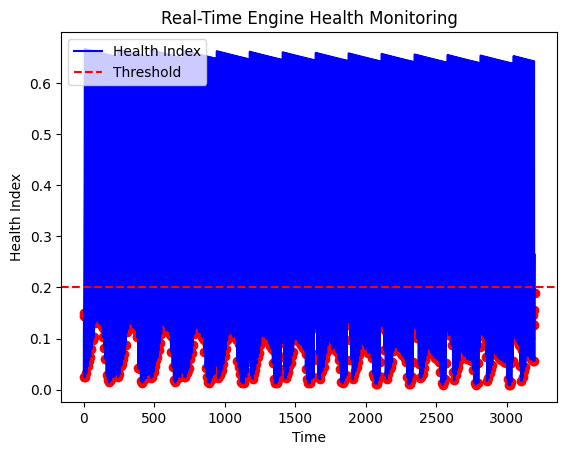

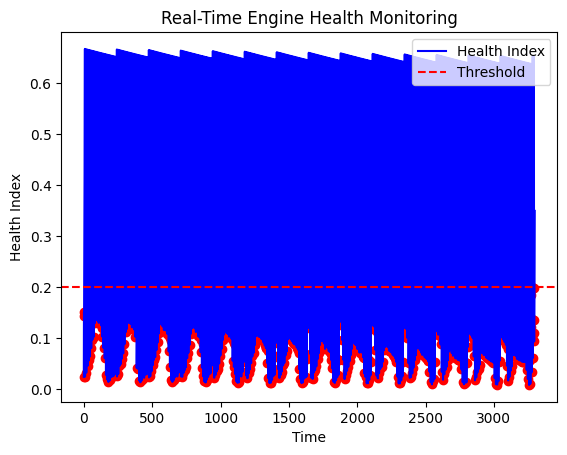

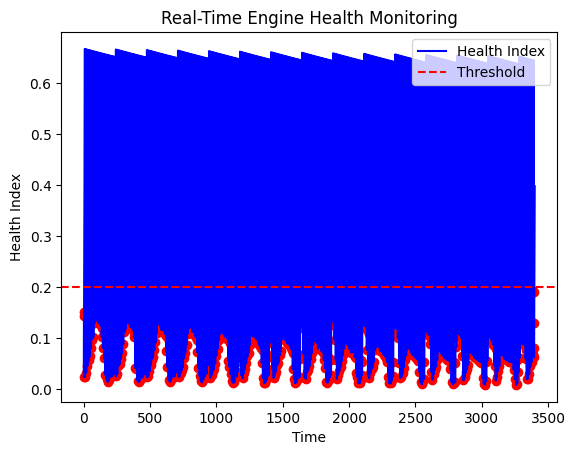

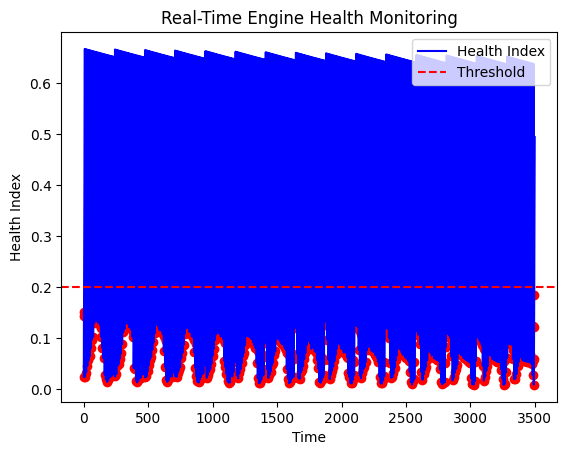

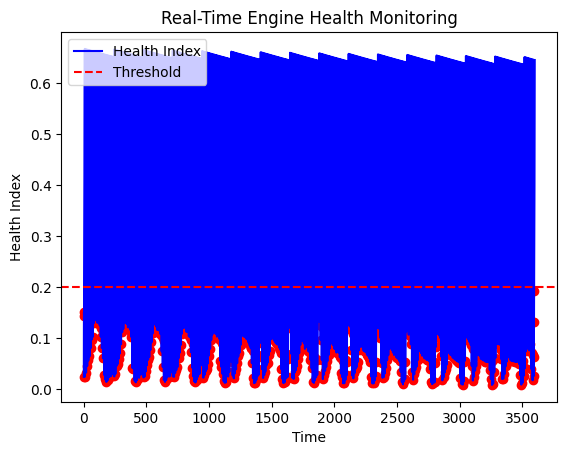

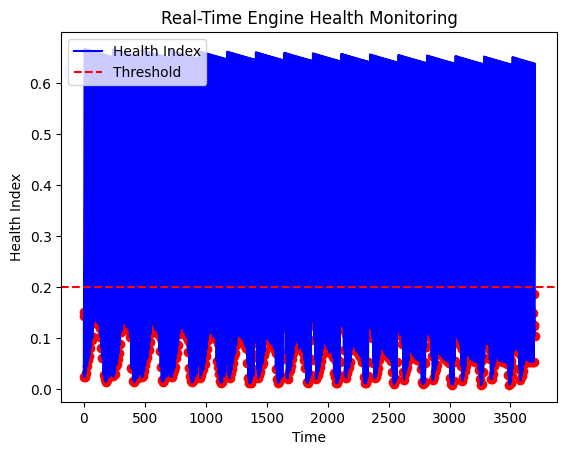

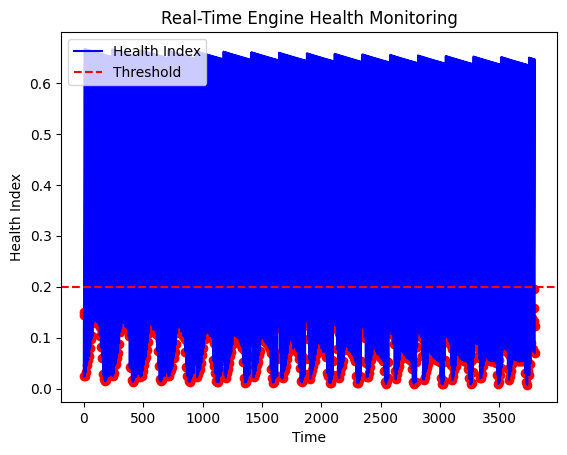

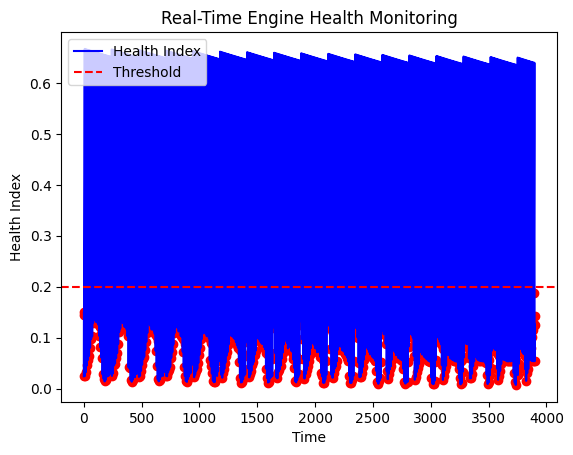

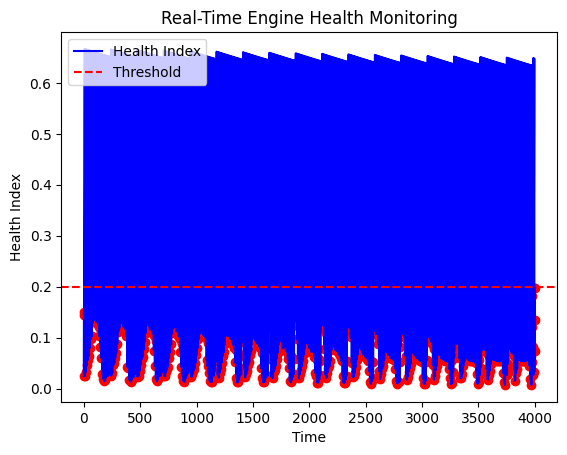

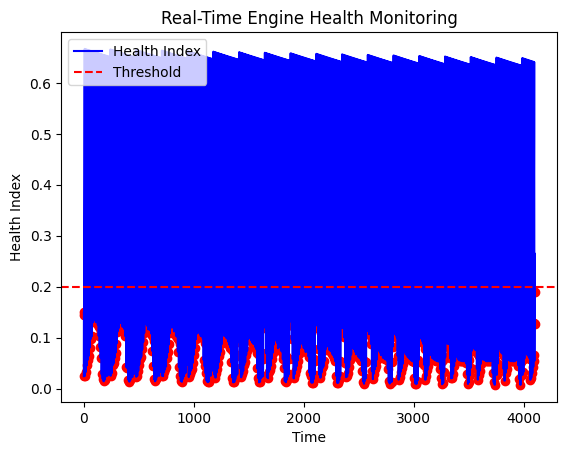

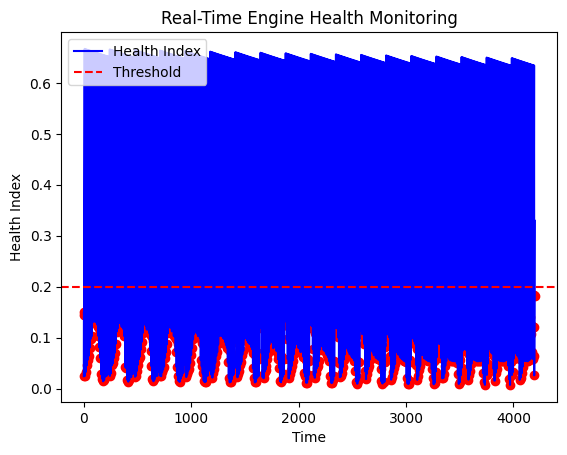

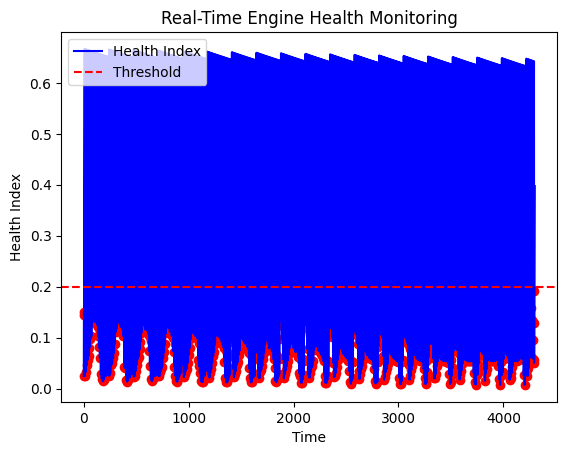

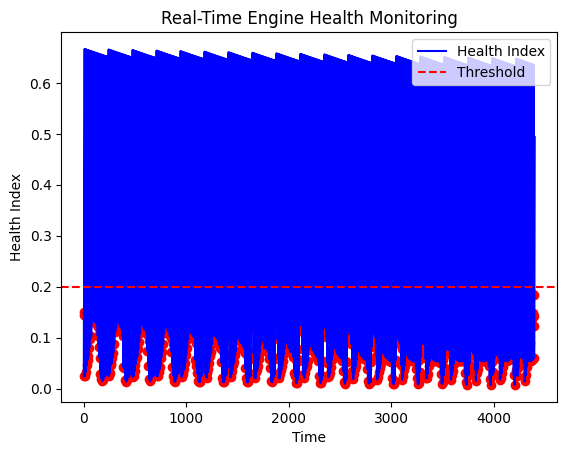

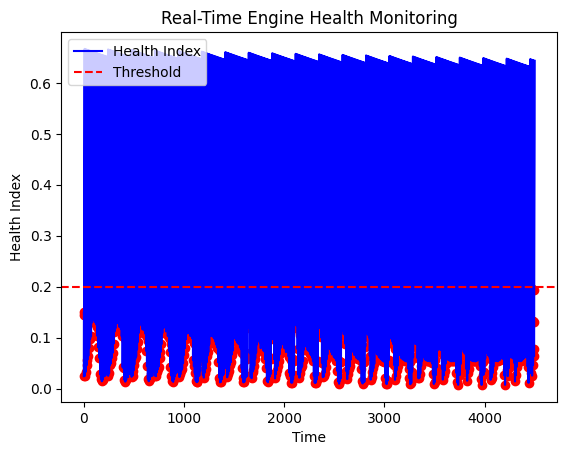

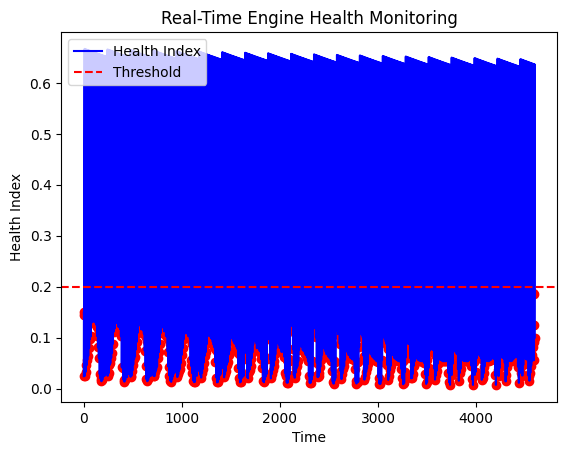

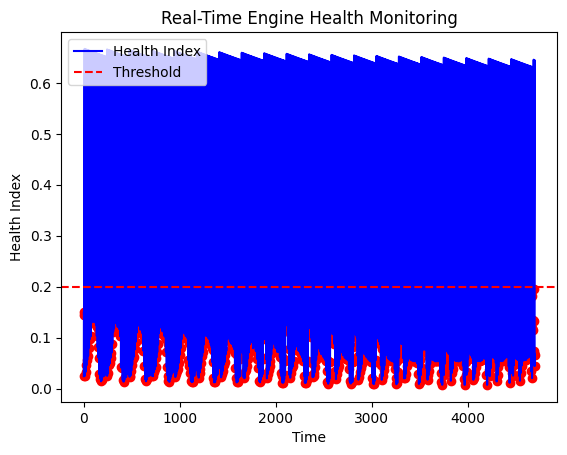

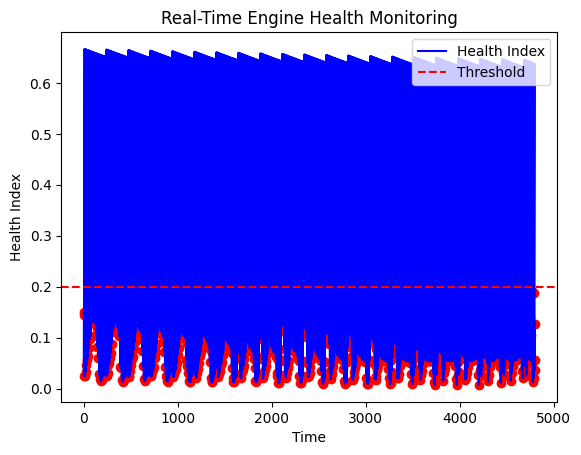

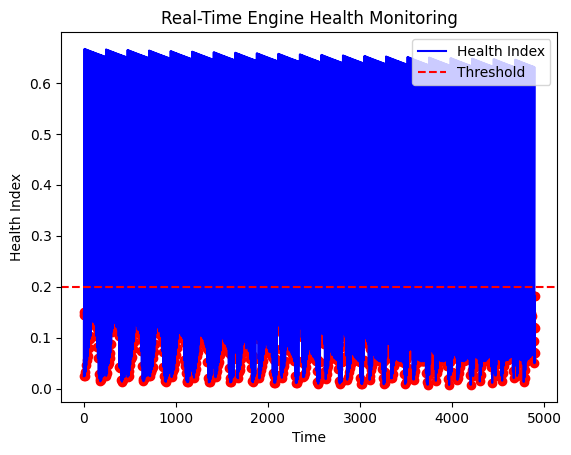

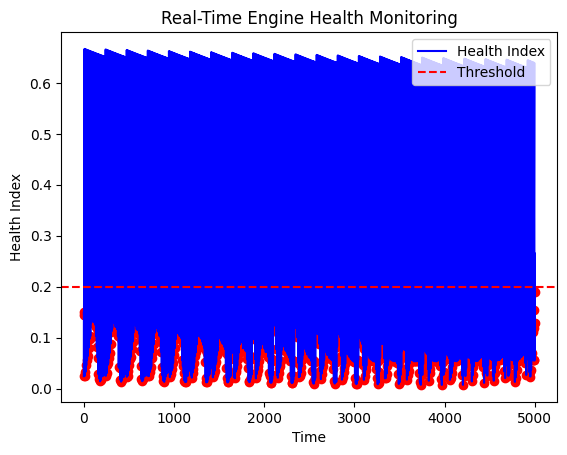

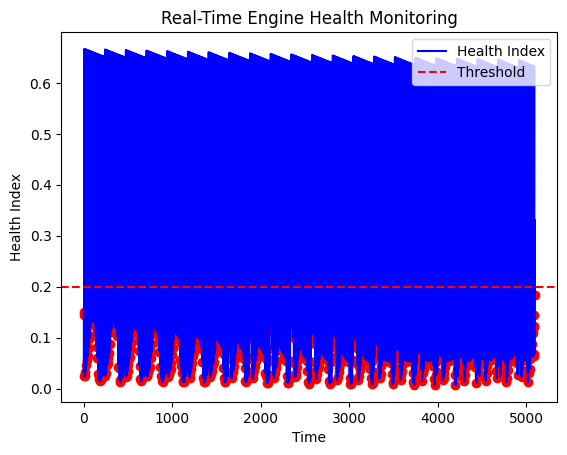

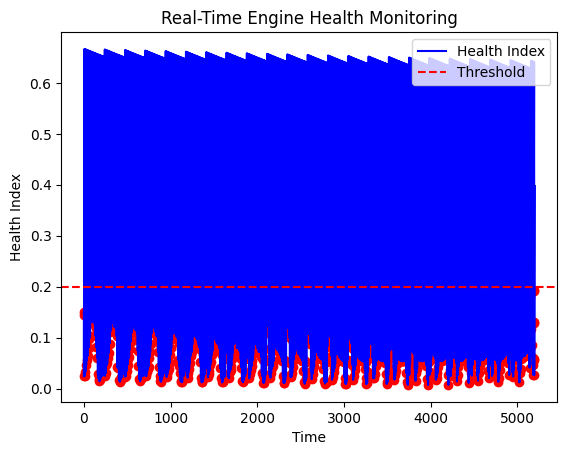

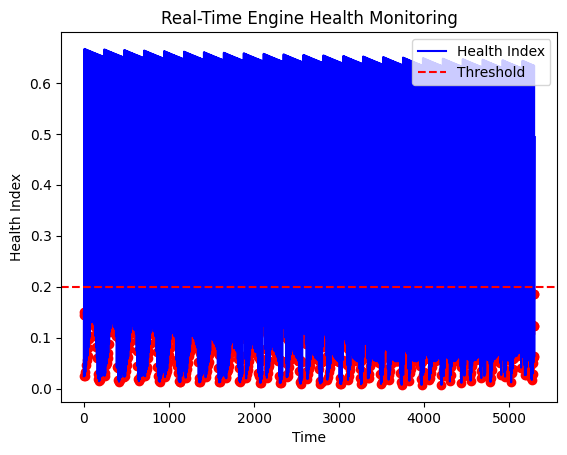

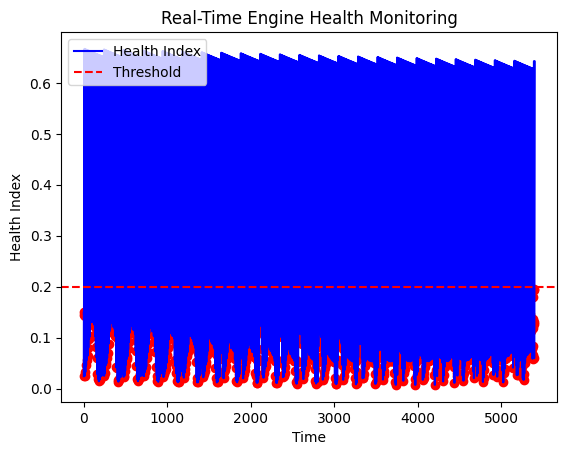

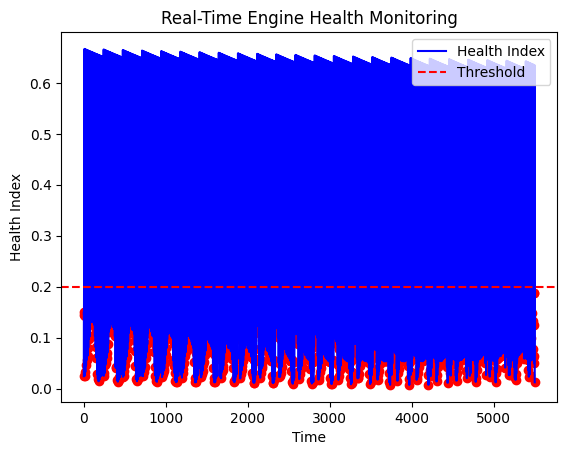

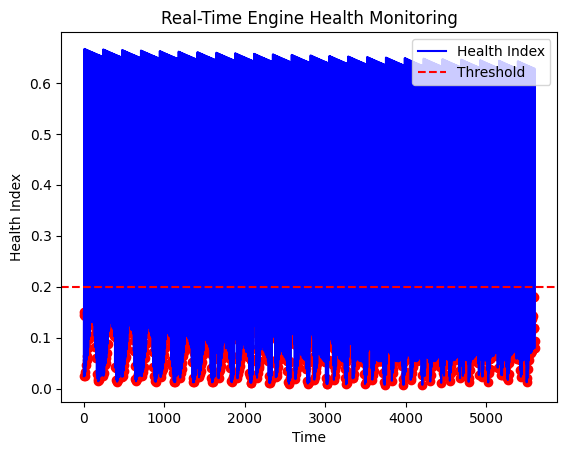

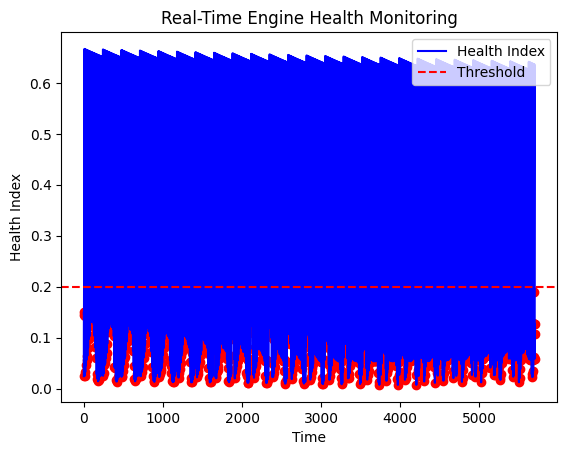

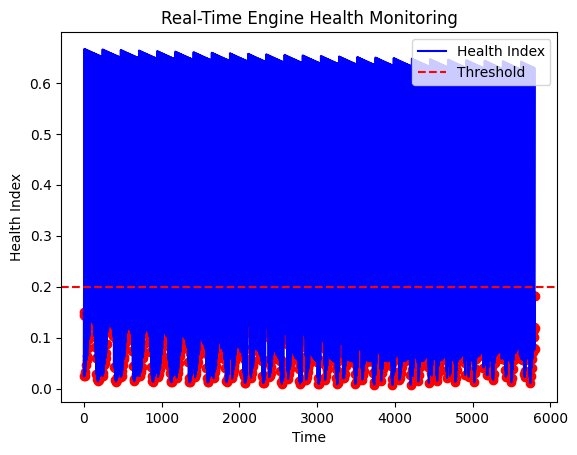

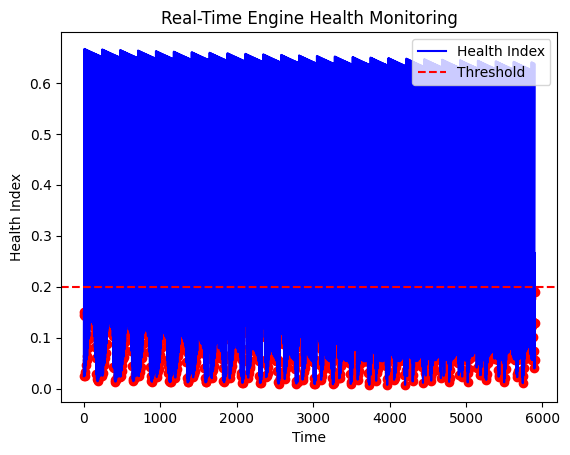

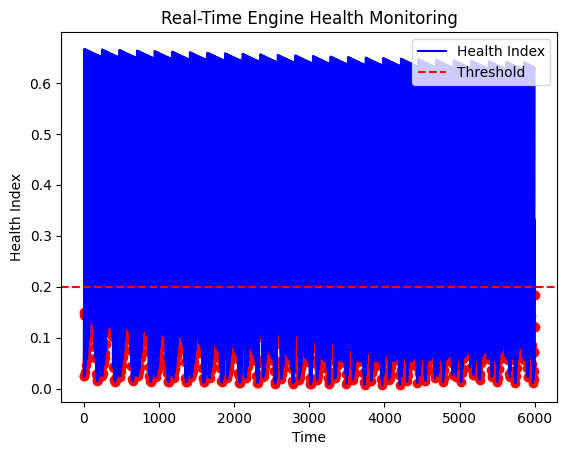

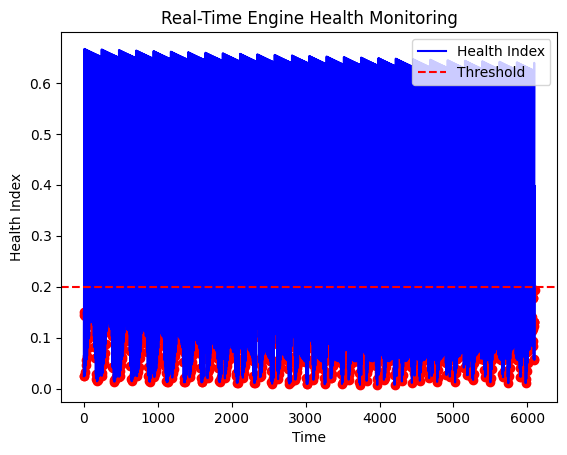

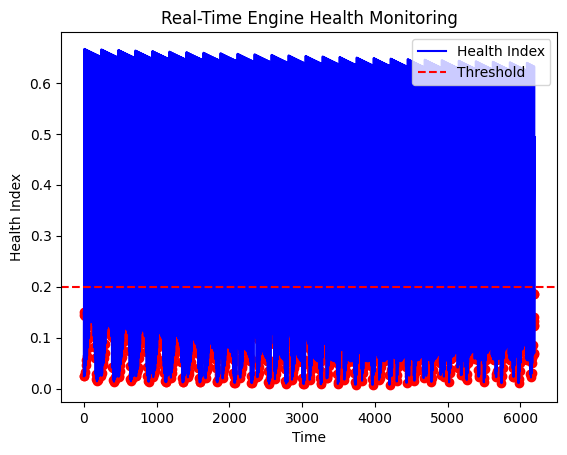

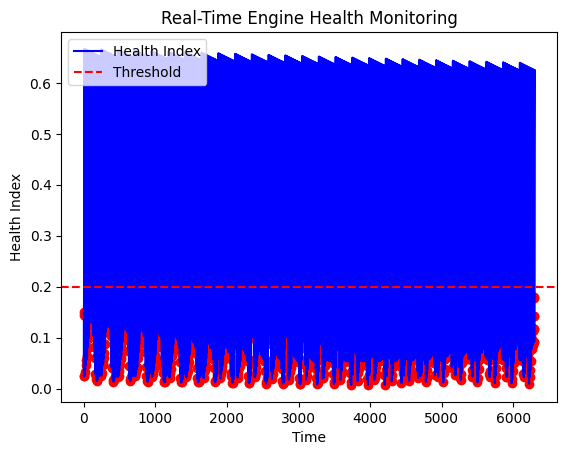

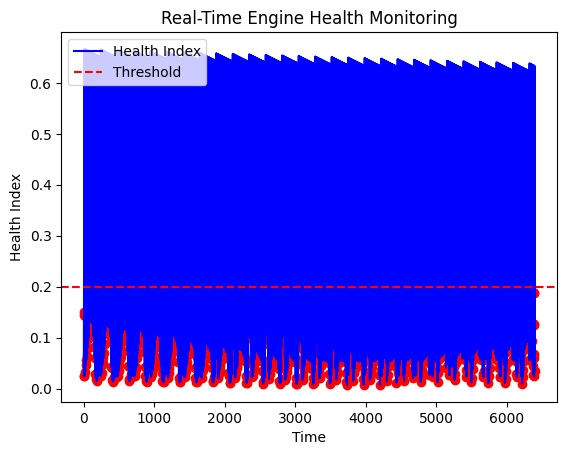

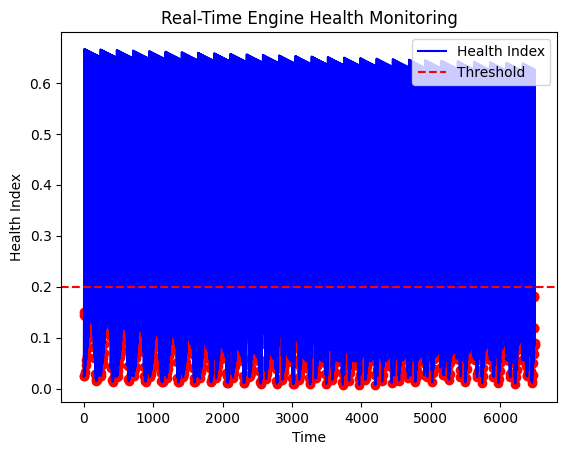

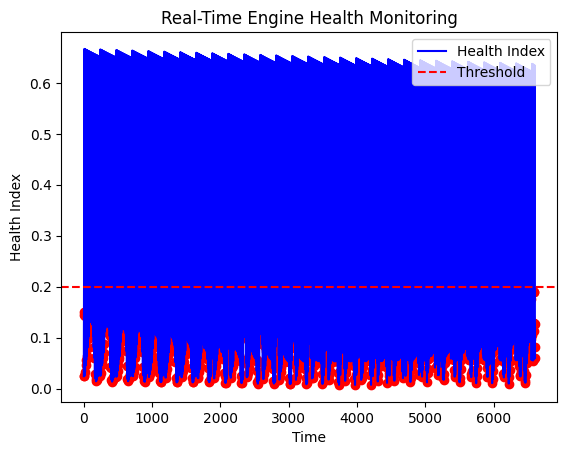

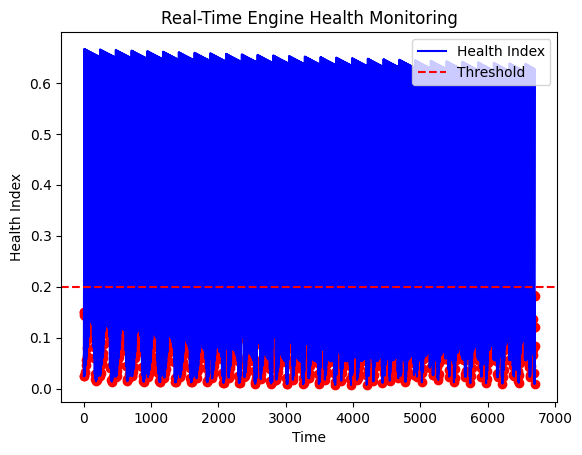

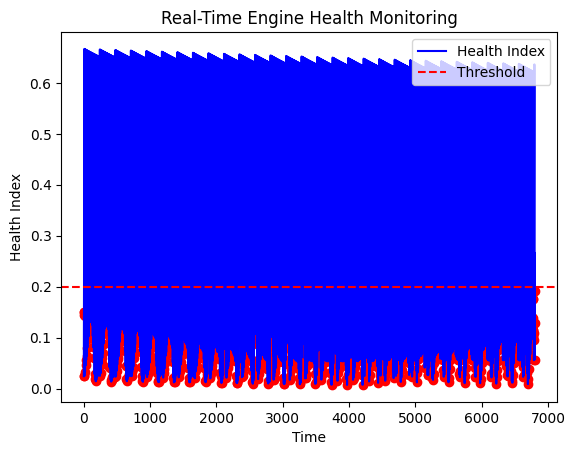

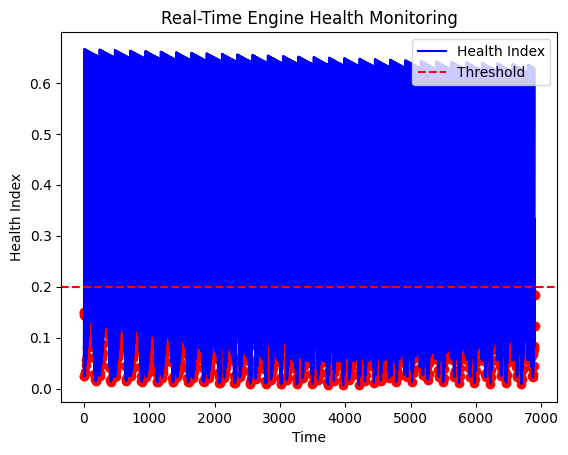

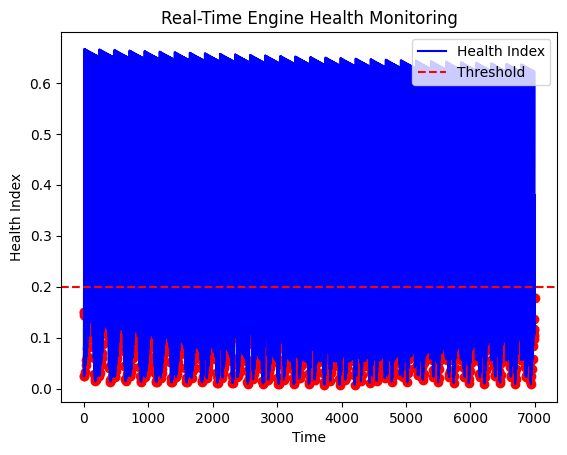

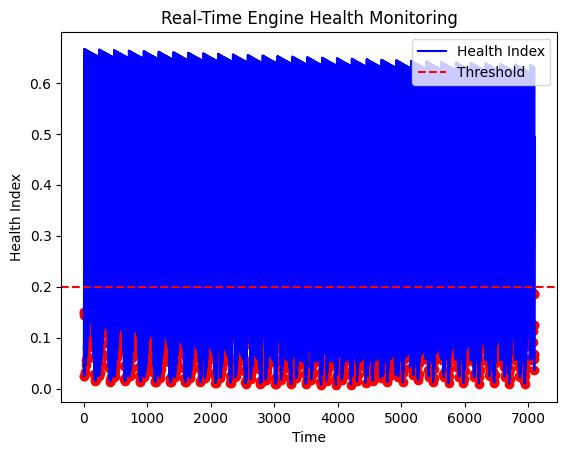

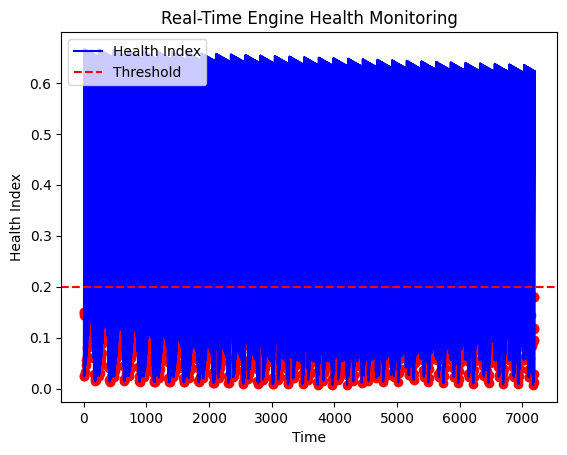

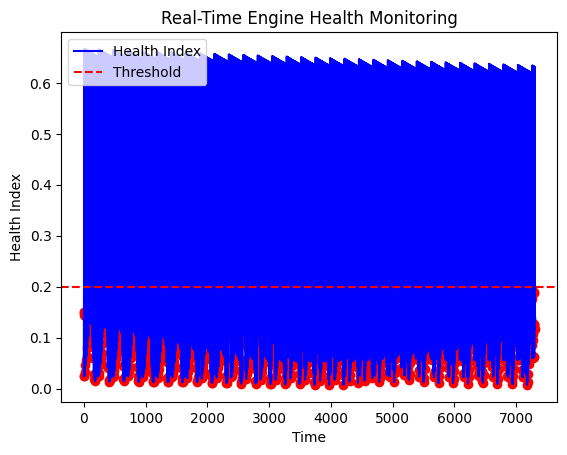

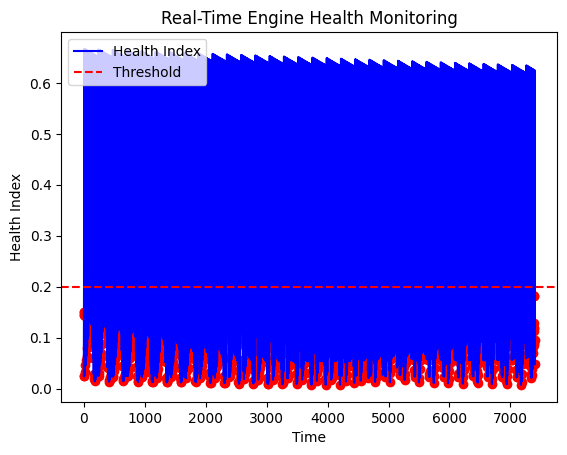

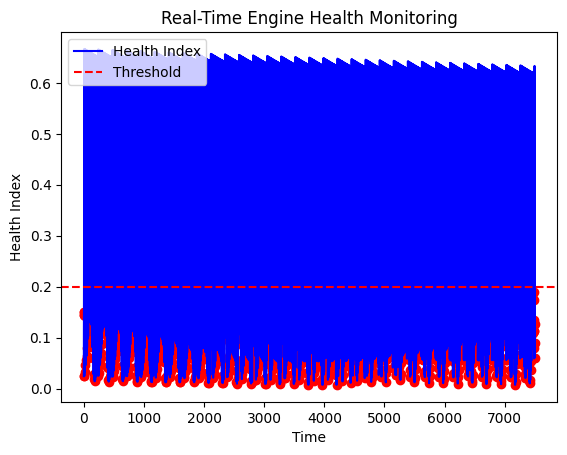

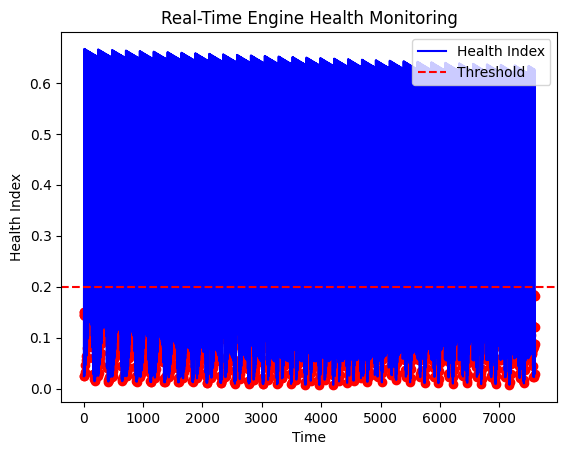

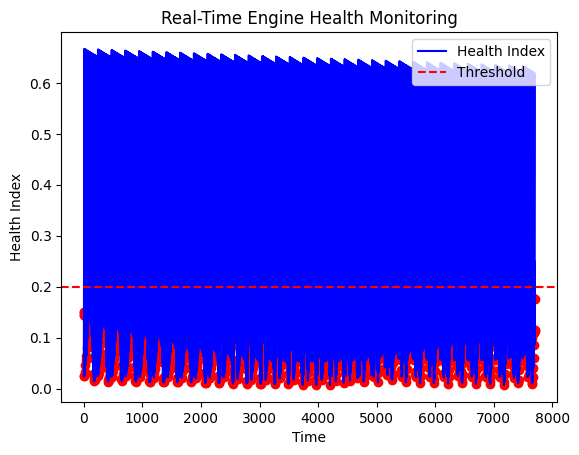

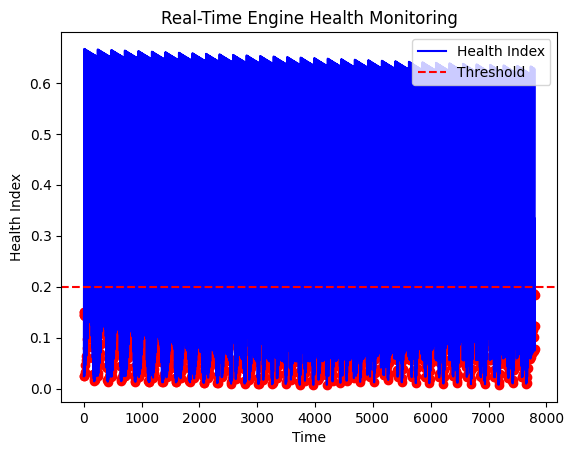

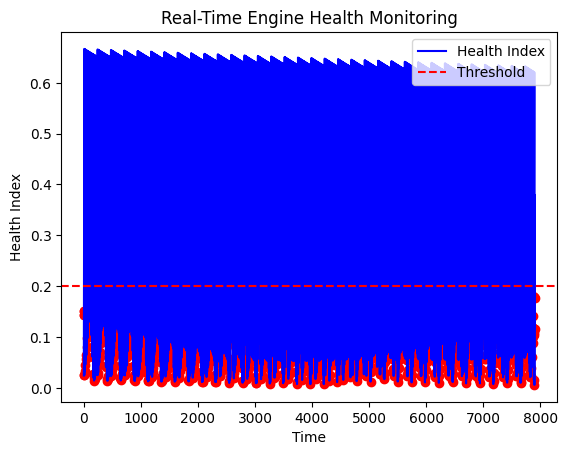

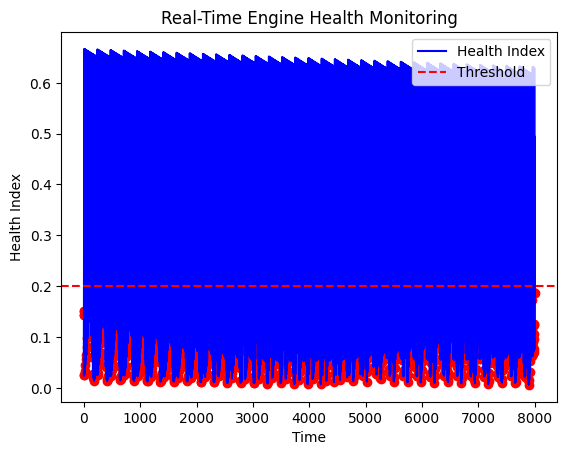

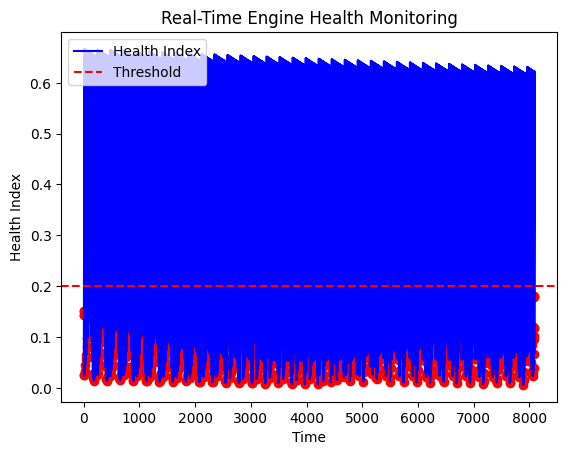

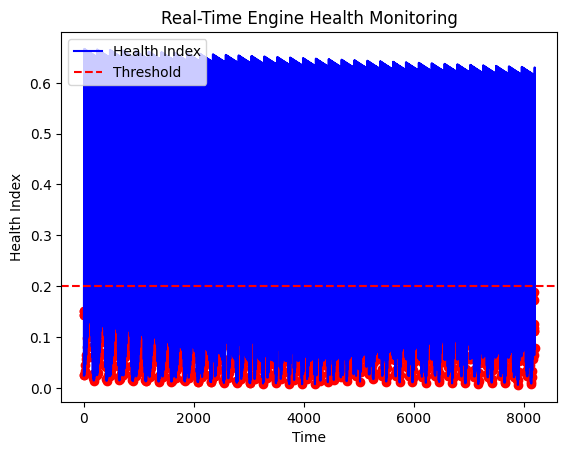

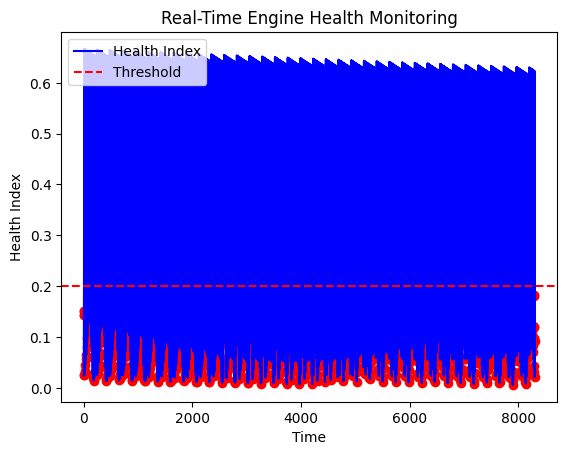

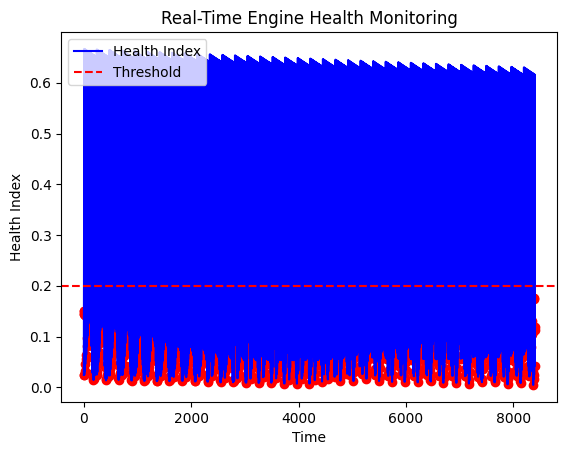

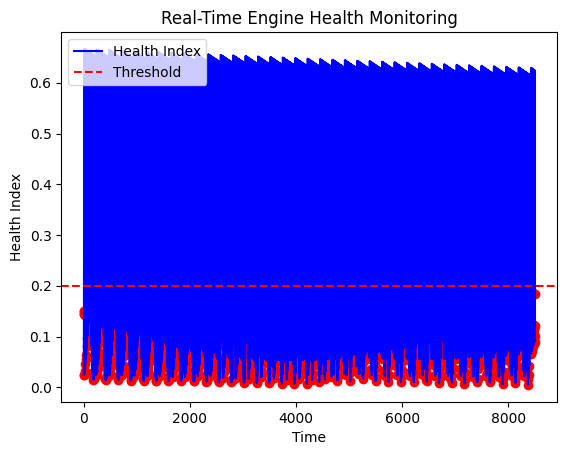

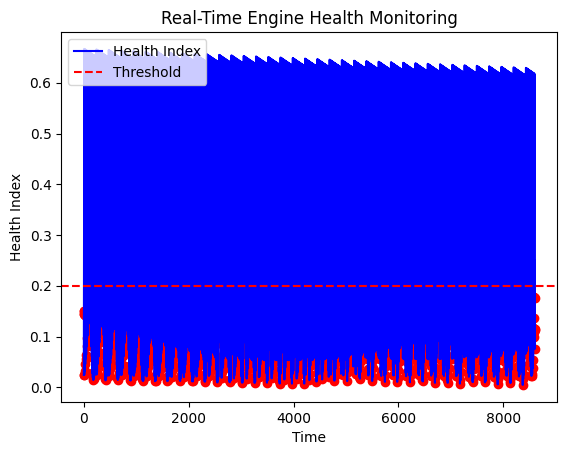

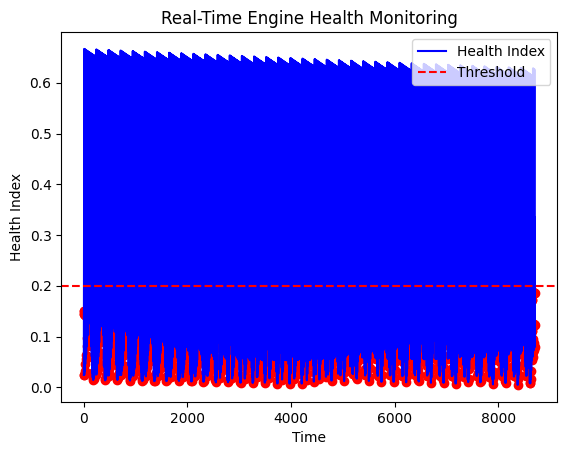

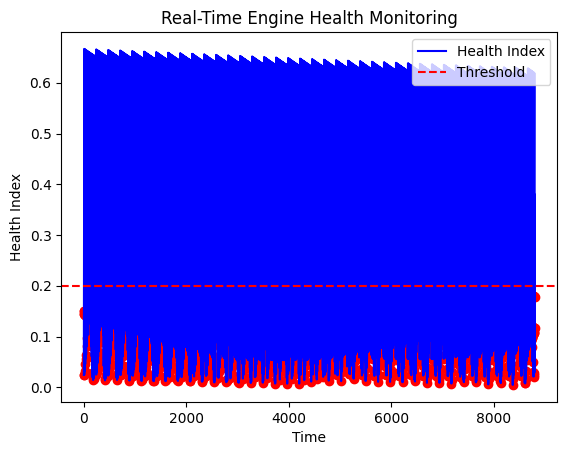

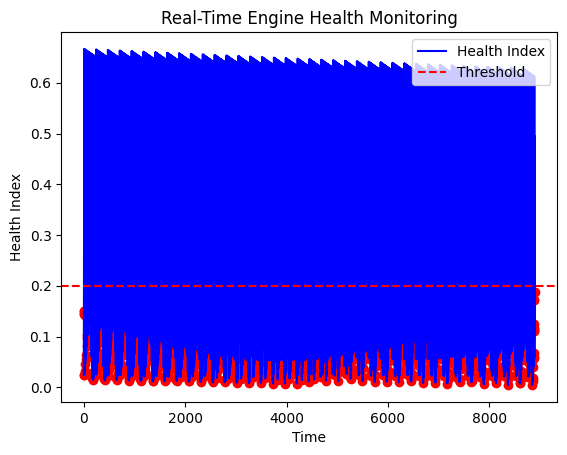

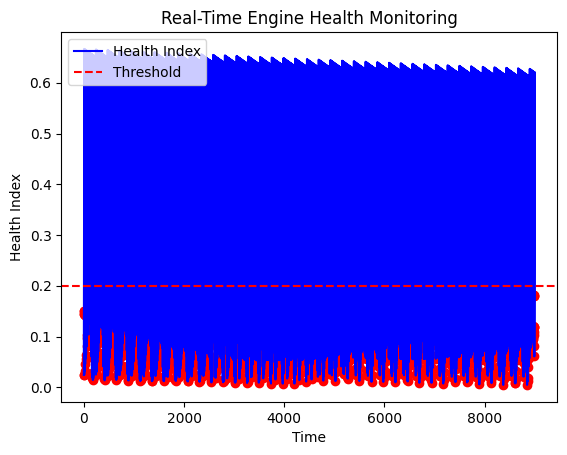

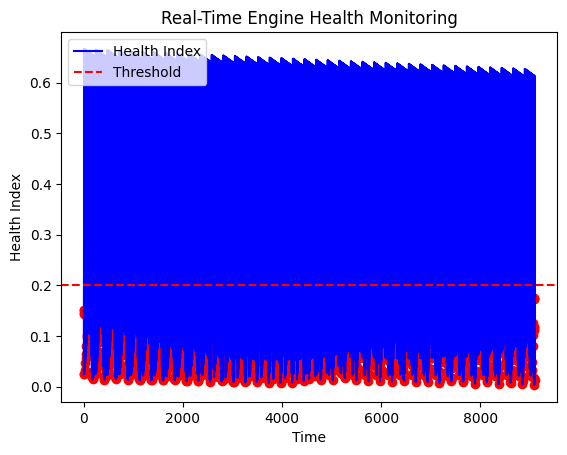

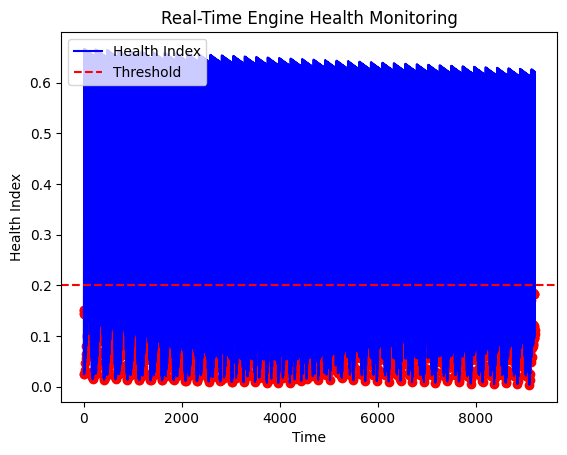

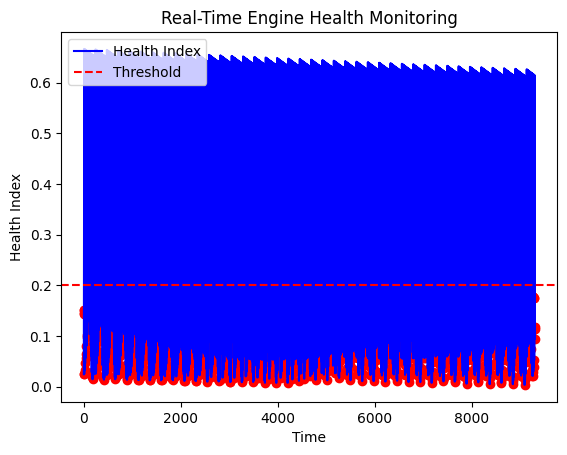

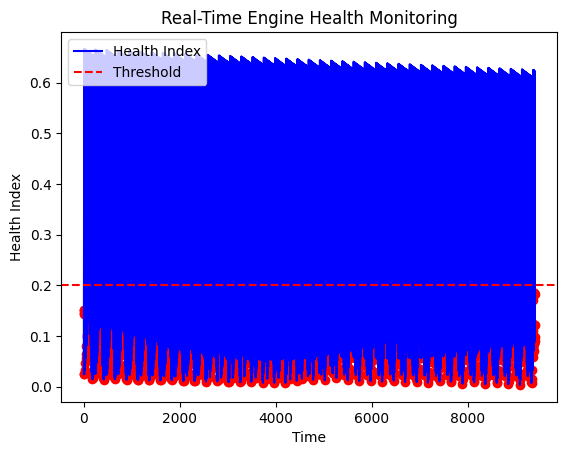

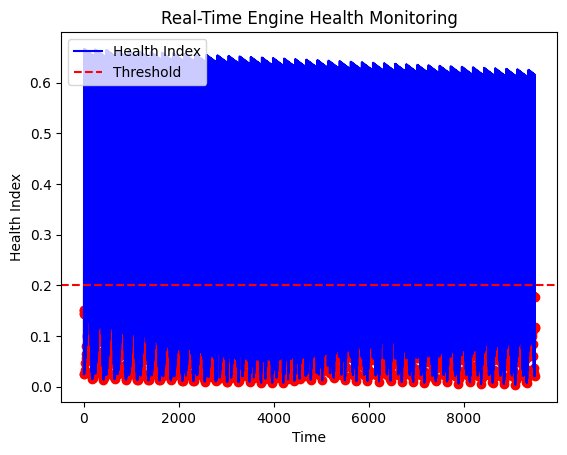

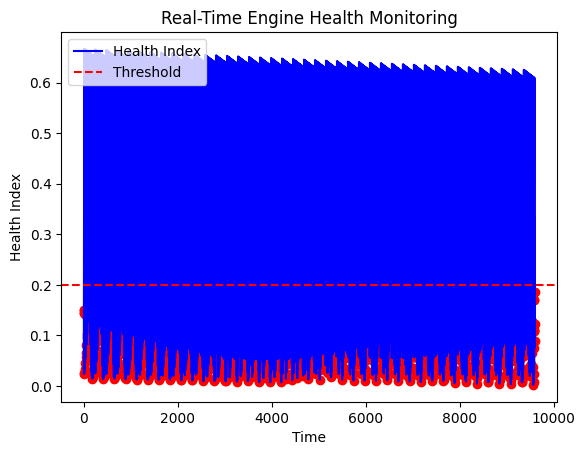

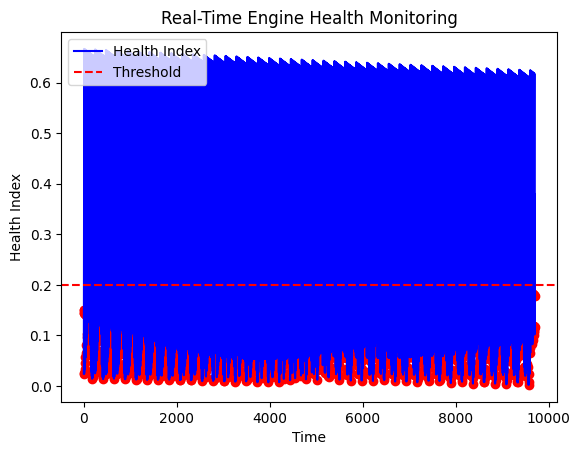

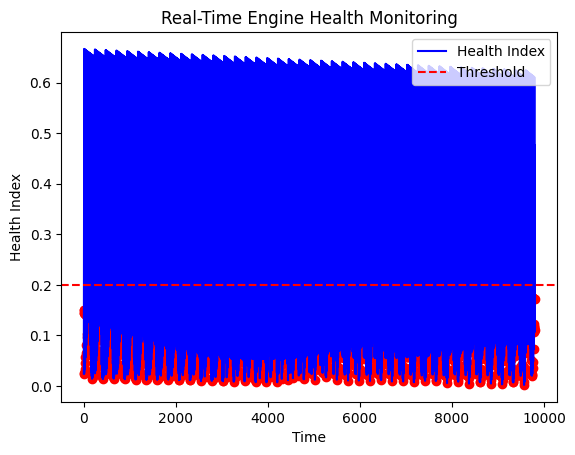

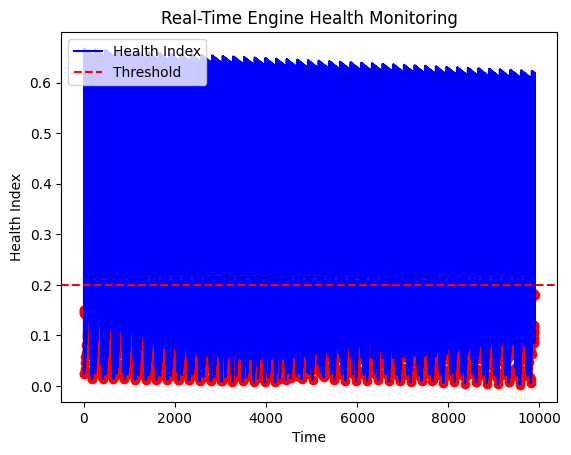

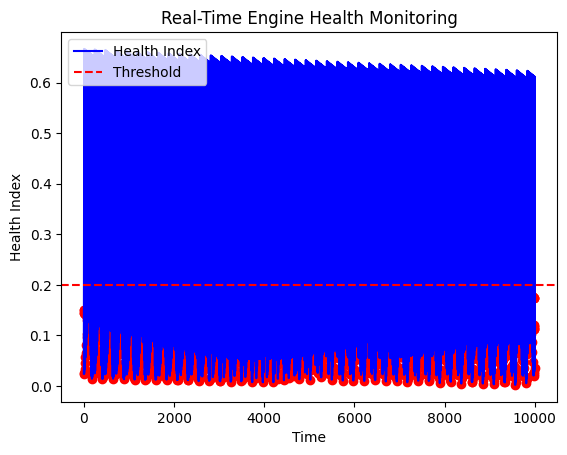

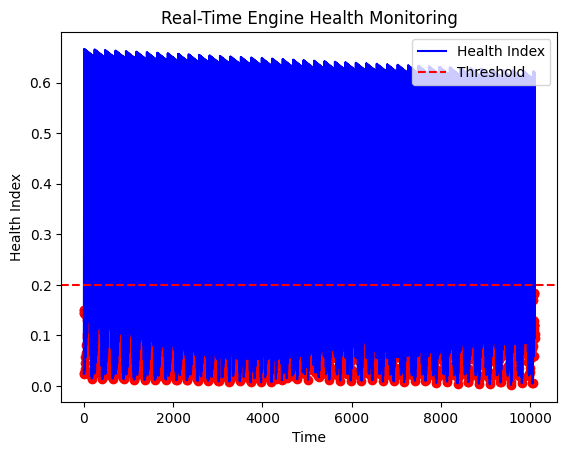

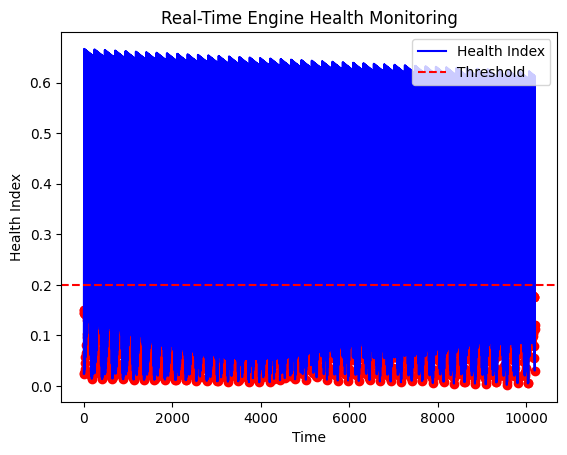

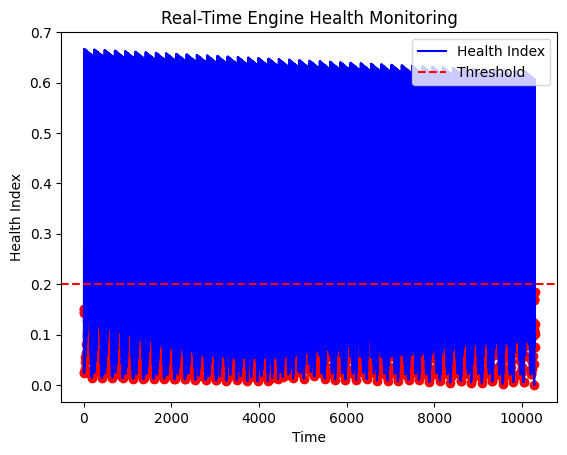

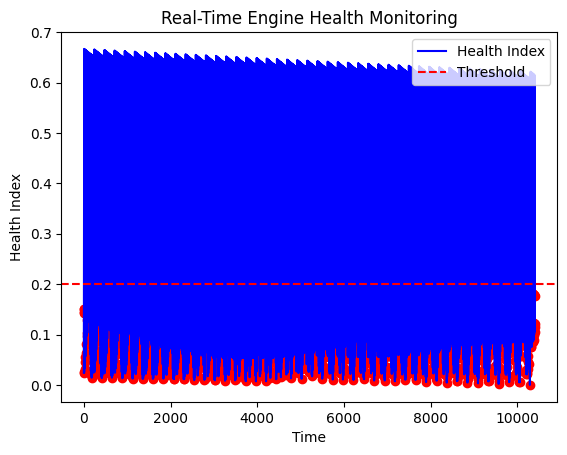

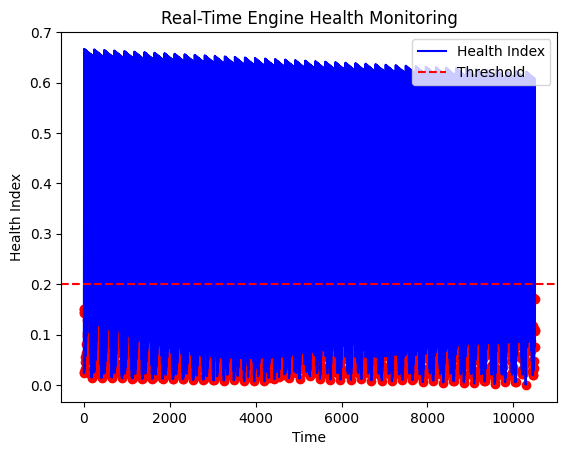

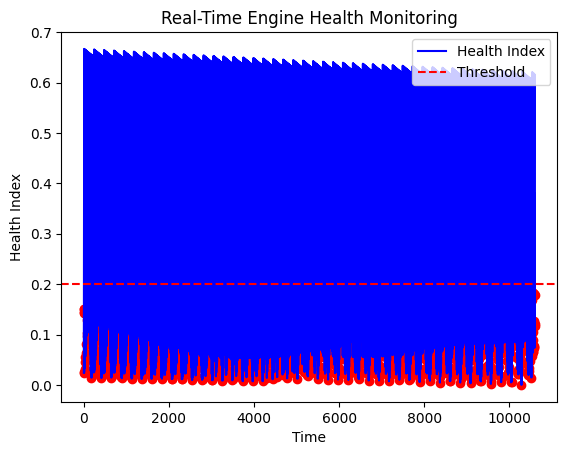

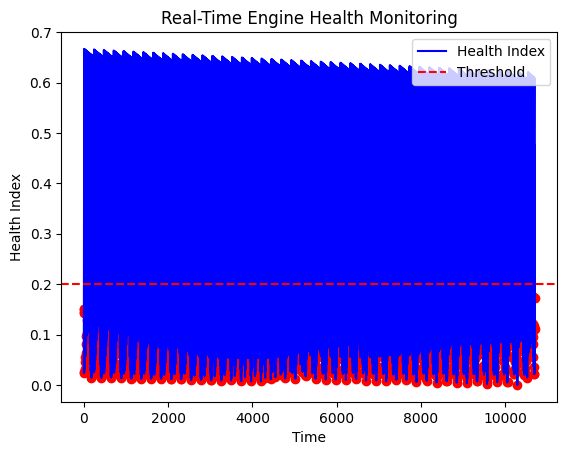

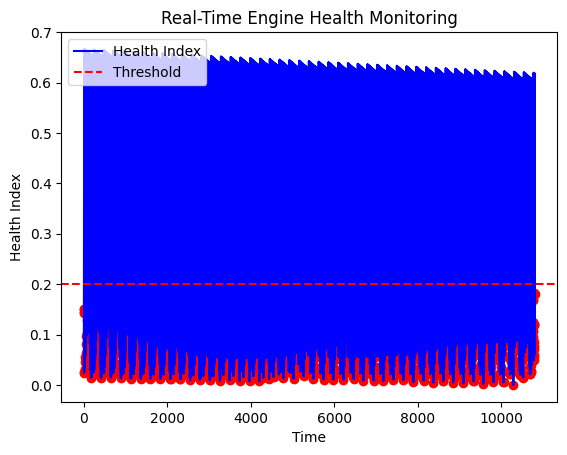

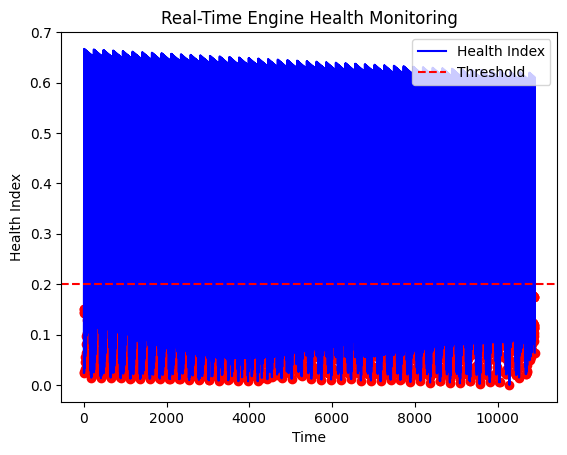

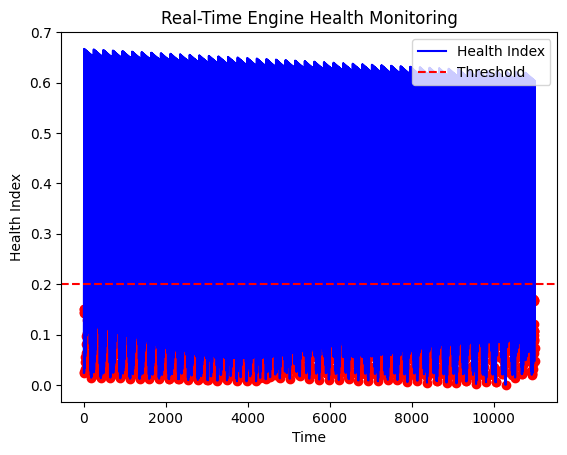

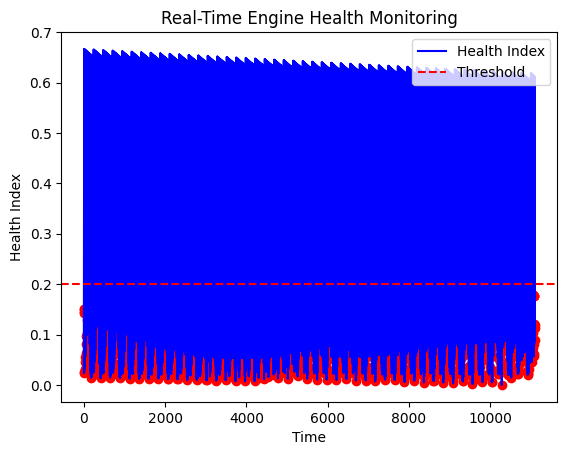

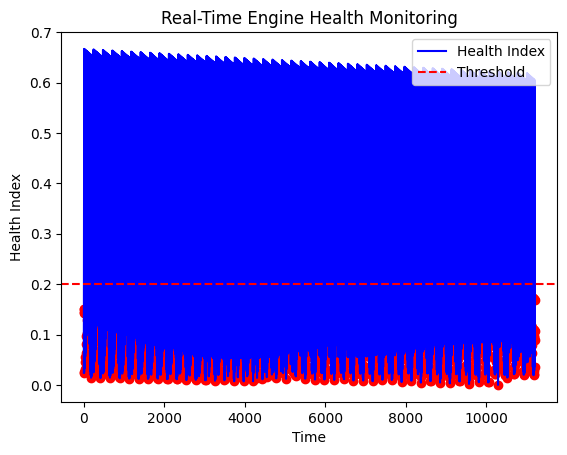

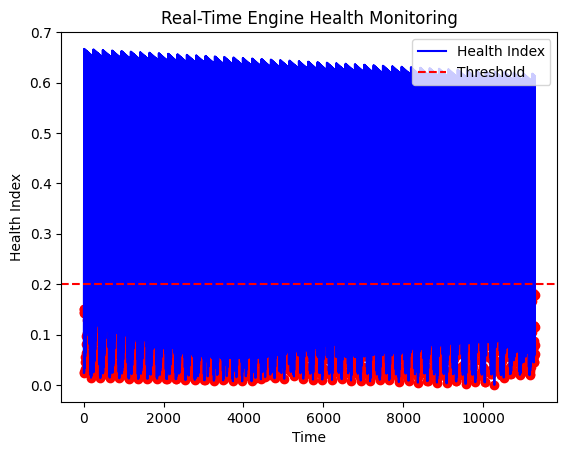

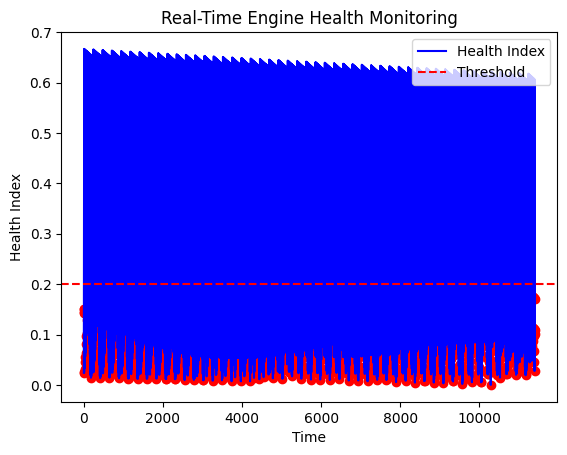

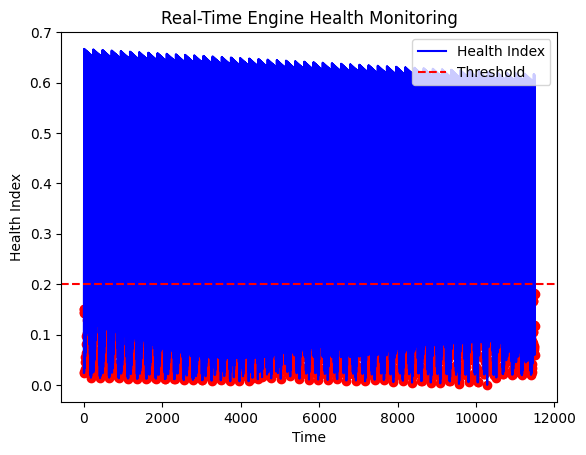

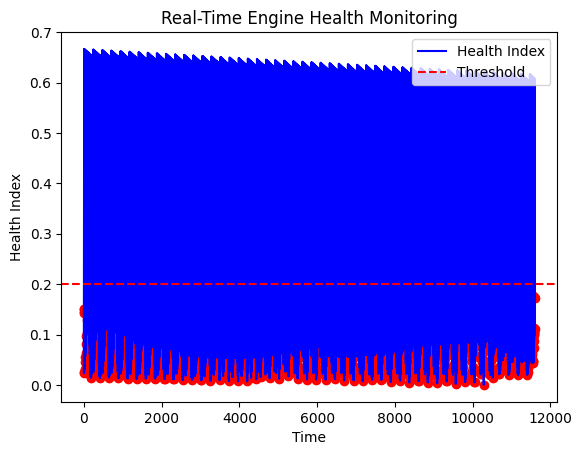

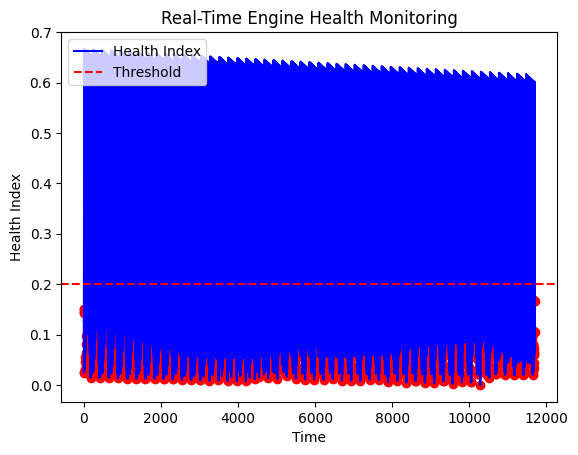

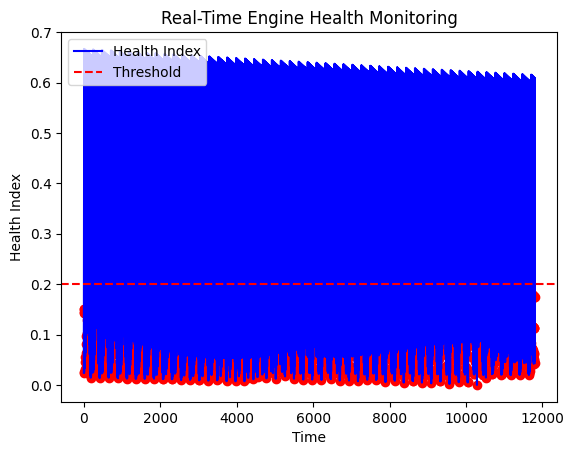

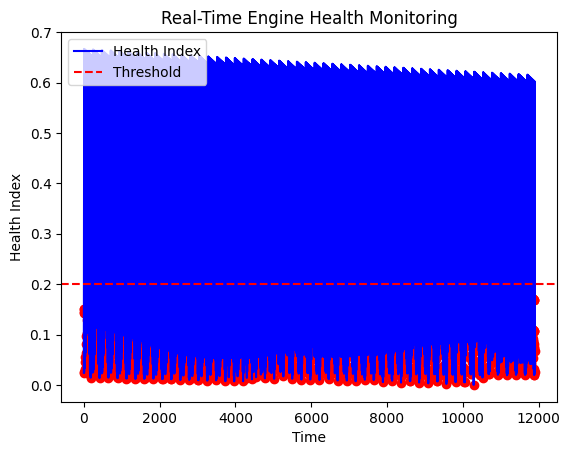

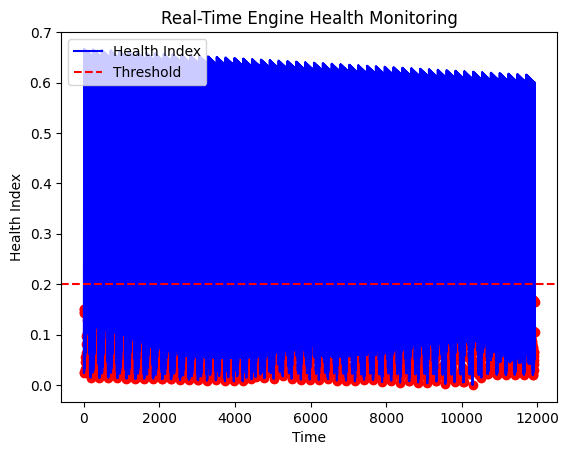

In [17]:
# Cell 6: Real-time simulation of monitoring
import time
import numpy as np

# Take scaled data from before
health_index = df_scaled["health_index"].values

for i in range(0, len(health_index), 100):  # simulate batches of 100 readings
    window = health_index[:i+100]
    
    plt.clf()
    plt.plot(window, label="Health Index", color="blue")
    plt.axhline(0.2, color="red", linestyle="--", label="Threshold")
    
    # Mark anomalies
    anomalies = np.where(window < 0.2)[0]
    plt.scatter(anomalies, window[anomalies], color="red")
    
    plt.title("Real-Time Engine Health Monitoring")
    plt.xlabel("Time")
    plt.ylabel("Health Index")
    plt.legend()
    plt.pause(0.1)   # short pause to simulate live updates

plt.show()
